In [23]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
import scipy.stats as stats
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')


# Alex's Code
#Ensure that the Resources folder is Unzipped before beginning processing
#Please download the Google Search trends dataset from (https://storage.googleapis.com/covid19-open-data/v3/google-search-trends.csv) and place in the resources folder before running (dataset is too large to upload to github)

In [3]:
#Setup Data Files
trends_data = Path("../Resources/google-search-trends.csv")

#Read as CSV & convert to DF 
trends_df = pd.read_csv(trends_data)


trends_df

date location_key  search_trends_abdominal_obesity  \
0        2020-01-01           AU                             3.56   
1        2020-01-02           AU                             3.46   
2        2020-01-03           AU                             3.40   
3        2020-01-04           AU                             3.43   
4        2020-01-05           AU                             3.29   
...             ...          ...                              ...   
2713924  2022-09-04  US_WY_56045                              NaN   
2713925  2022-09-05  US_WY_56045                              NaN   
2713926  2022-09-06  US_WY_56045                              NaN   
2713927  2022-09-08  US_WY_56045                              NaN   
2713928  2022-09-12  US_WY_56045                              NaN   

         search_trends_abdominal_pain  search_trends_acne  \
0                                5.38               10.76   
1                                5.35               11.30   
2                                5.35               11.23   
3                                5.23               10.68   
4                                5.14               10.20   
...                               ...                 ...   
2713924                           NaN                 NaN   
2713925                           NaN                 NaN   
2713926                           NaN                 NaN   
2713927                           NaN                 NaN   
2713928                           NaN                 NaN   

         search_trends_actinic_keratosis  search_trends_acute_bronchitis  \
0                                   0.52                            0.35   
1                                   0.55                            0.36   
2                                   0.53                            0.34   
3                                   0.42                            0.35   
4                                   0.49                            0.38   
...                                  ...                             ...   
2713924                              NaN                             NaN   
2713925                              NaN                             NaN   
2713926                              NaN                             NaN   
2713927                              NaN                             NaN   
2713928                              NaN                             NaN   

         search_trends_adrenal_crisis  search_trends_ageusia  \
0                                0.12                   0.05   
1                                0.14                   0.06   
2                                0.12                   0.05   
3                                0.11                   0.05   
4                                0.11                    NaN   
...                               ...                    ...   
2713924                           NaN                    NaN   
2713925                           NaN                    NaN   
2713926                           NaN                    NaN   
2713927                           NaN                    NaN   
2713928                           NaN                    NaN   

         search_trends_alcoholism  ...  search_trends_visual_acuity  \
0                            5.36  ...                         0.70   
1                            4.62  ...                         0.44   
2                            4.63  ...                         0.29   
3                            4.82  ...                         0.28   
4                            4.26  ...                         0.38   
...                           ...  ...                          ...   
2713924                       NaN  ...                          NaN   
2713925                       NaN  ...                          NaN   
2713926                       NaN  ...                          NaN   
2713927                       NaN  ...                       

In [5]:
#filter by US only
trends_df_us = trends_df.loc[trends_df['location_key'] == "US"]

trends_df_us

date location_key  search_trends_abdominal_obesity  \
12818  2020-01-01           US                             2.42   
12819  2020-01-02           US                             2.40   
12820  2020-01-03           US                             2.13   
12821  2020-01-04           US                             2.30   
12822  2020-01-05           US                             2.53   
...           ...          ...                              ...   
13799  2022-09-08           US                             1.59   
13800  2022-09-09           US                             1.42   
13801  2022-09-10           US                             1.61   
13802  2022-09-11           US                             1.78   
13803  2022-09-12           US                             1.70   

       search_trends_abdominal_pain  search_trends_acne  \
12818                          4.71                8.63   
12819                          4.66                9.16   
12820                          4.54                8.75   
12821                          4.60                9.16   
12822                          4.59                9.31   
...                             ...                 ...   
13799                          4.08                6.37   
13800                          3.97                6.15   
13801                          4.27                6.85   
13802                          4.38                7.19   
13803                          4.38                6.60   

       search_trends_actinic_keratosis  search_trends_acute_bronchitis  \
12818                             0.26                            0.83   
12819                             0.31                            0.93   
12820                             0.29                            0.91   
12821                             0.25                            0.86   
12822                             0.26                            0.81   
...                                ...                             ...   
13799                             0.38                            0.35   
13800                             0.35                            0.34   
13801                             0.34                            0.35   
13802                             0.34                            0.36   
13803                             0.37                            0.38   

       search_trends_adrenal_crisis  search_trends_ageusia  \
12818                          0.09                   0.05   
12819                          0.09                   0.05   
12820                          0.10                   0.05   
12821                          0.09                   0.05   
12822                          0.09                   0.05   
...                             ...                    ...   
13799                          0.10                   0.05   
13800                          0.09                   0.05   
13801                          0.10                   0.06   
13802                          0.10                   0.06   
13803                          0.10                   0.06   

       search_trends_alcoholism  ...  search_trends_visual_acuity  \
12818                      5.78  ...                         0.47   
12819                      4.80  ...                         0.33   
12820                      4.51  ...                         0.29   
12821                      4.54  ...                         0.24   
12822                      4.31  ...                         0.23   
...                         ...  ...                          ...   
13799                      3.49  ...                         0.20   
13800                      3.79  ...                         0.19   
13801                      4.03  ...                         0.16   
13802                      3.75  ...                         0.16   
13803                      3.59  ...                         0.21   

       search_trends_vomiting  searc

In [6]:
#loop through column headers and print their names to find which columns we should sort by 
for col in trends_df_us:
    print(col)

date
location_key
search_trends_abdominal_obesity
search_trends_abdominal_pain
search_trends_acne
search_trends_actinic_keratosis
search_trends_acute_bronchitis
search_trends_adrenal_crisis
search_trends_ageusia
search_trends_alcoholism
search_trends_allergic_conjunctivitis
search_trends_allergy
search_trends_amblyopia
search_trends_amenorrhea
search_trends_amnesia
search_trends_anal_fissure
search_trends_anaphylaxis
search_trends_anemia
search_trends_angina_pectoris
search_trends_angioedema
search_trends_angular_cheilitis
search_trends_anosmia
search_trends_anxiety
search_trends_aphasia
search_trends_aphonia
search_trends_apnea
search_trends_arthralgia
search_trends_arthritis
search_trends_ascites
search_trends_asperger_syndrome
search_trends_asphyxia
search_trends_asthma
search_trends_astigmatism
search_trends_ataxia
search_trends_atheroma
search_trends_attention_deficit_hyperactivity_disorder
search_trends_auditory_hallucination
search_trends_autoimmune_disease
search_trends_avoidan

In [7]:
#relevant terms
#search_trends_shortness_of_breath
#search_trends_cough
#search_trends_chills
#search_trends_fatigue
#search_trends_headache
#search_trends_fever
#search_trends_sore_throat
#search_trends_anosmia (loss of smell)
#search_trends_ageusia (loss of taste)


#separate out individual columns with relevant data
cleaned_trends_df = trends_df_us.filter(["date","location_key","search_trends_shortness_of_breath","search_trends_cough","search_trends_chills","search_trends_fatigue","search_trends_headache","search_trends_fever","search_trends_sore_throat","search_trends_anosmia","search_trends_ageusia"], axis = 1)

cleaned_trends_df.head()

date location_key  search_trends_shortness_of_breath  \
12818  2020-01-01           US                               0.71   
12819  2020-01-02           US                               0.79   
12820  2020-01-03           US                               0.75   
12821  2020-01-04           US                               0.71   
12822  2020-01-05           US                               0.70   

       search_trends_cough  search_trends_chills  search_trends_fatigue  \
12818                 9.75                  0.42                   4.24   
12819                10.30                  0.41                   4.56   
12820                10.15                  0.40                   4.42   
12821                 9.97                  0.40                   4.37   
12822                 9.49                  0.40                   4.51   

       search_trends_headache  search_trends_fever  search_trends_sore_throat  \
12818                    4.94                 4.62                       2.81   
12819                    4.39                 4.74                       2.87   
12820                    4.27                 4.68                       2.84   
12821                    4.39                 4.69                       2.79   
12822                    4.30                 4.60                       2.66   

       search_trends_anosmia  search_trends_ageusia  
12818                   0.06                   0.05  
12819                   0.06                   0.05  
12820                   0.06                   0.05  
12821                   0.06                   0.05  
12822                   0.06                   0.05

Text(0, 0.5, 'Cough Search Volume')

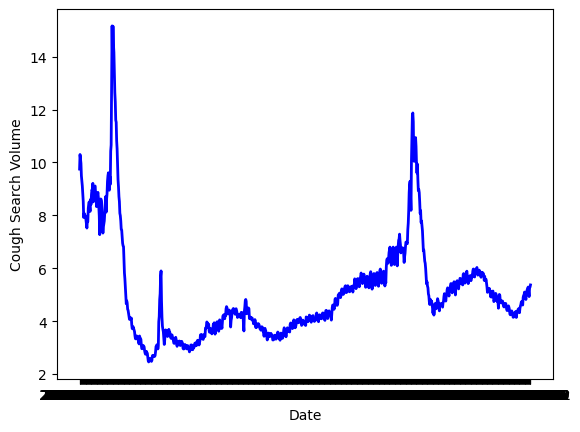

In [8]:
#line graph of of cough searches by date
date = cleaned_trends_df["date"]
cough = cleaned_trends_df["search_trends_cough"]

#plot graph
plt.plot(date, cough, linewidth =2, color = "blue")
plt.xlabel("Date")
plt.ylabel("Cough Search Volume")



In [9]:
#import hospitalization data

hosp_data = Path("../Resources/us.csv")
hosp_df = pd.read_csv(hosp_data)


In [10]:
#calculate daily change in cases 
hosp_df["change_in_cases"] = hosp_df["cases"] - hosp_df["cases"].shift(1)
hosp_df = hosp_df.dropna()
hosp_df

date      cases   deaths  change_in_cases
1     2020-01-22          1        0              0.0
2     2020-01-23          1        0              0.0
3     2020-01-24          2        0              1.0
4     2020-01-25          3        0              1.0
5     2020-01-26          5        0              2.0
...          ...        ...      ...              ...
1153  2023-03-19  103784916  1133826           1424.0
1154  2023-03-20  103794703  1133964           9787.0
1155  2023-03-21  103813076  1134177          18373.0
1156  2023-03-22  103864888  1134913          51812.0
1157  2023-03-23  103910034  1135343          45146.0

[1157 rows x 4 columns]

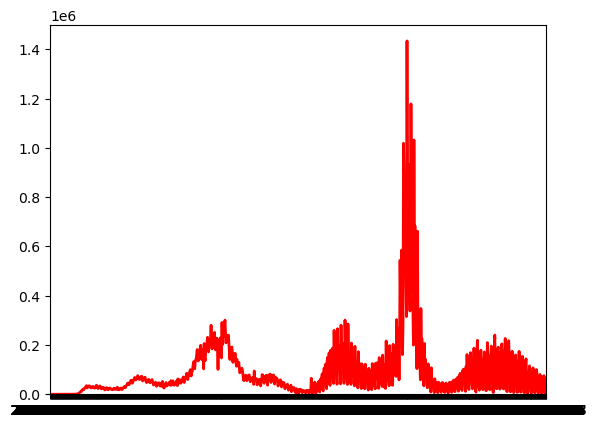

In [11]:
#plot daily change in cases trend

date2=hosp_df["date"]
new_hosp =hosp_df["change_in_cases"]
plt.axis([0,1000,0,1500000])
plt.plot(date2, new_hosp, linewidth=2, color="red")

In [12]:
#merged both cleaned dataframes, only looking at US cases & trends on specific topics
merge_df= pd.merge(hosp_df, cleaned_trends_df, on = "date")
merge_df

date     cases   deaths  change_in_cases location_key  \
0    2020-01-22         1        0              0.0           US   
1    2020-01-23         1        0              0.0           US   
2    2020-01-24         2        0              1.0           US   
3    2020-01-25         3        0              1.0           US   
4    2020-01-26         5        0              2.0           US   
..          ...       ...      ...              ...          ...   
960  2022-09-08  94921915  1045586          88425.0           US   
961  2022-09-09  94995800  1046119          73885.0           US   
962  2022-09-10  94999027  1046145           3227.0           US   
963  2022-09-11  95010491  1046164          11464.0           US   
964  2022-09-12  95098004  1046733          87513.0           US   

     search_trends_shortness_of_breath  search_trends_cough  \
0                                 0.73                 8.51   
1                                 0.74                 8.33   
2                                 0.70                 8.15   
3                                 0.69                 8.60   
4                                 0.71                 8.41   
..                                 ...                  ...   
960                               0.68                 5.09   
961                               0.64                 4.93   
962                               0.61                 5.26   
963                               0.65                 5.29   
964                               0.73                 5.37   

     search_trends_chills  search_trends_fatigue  search_trends_headache  \
0                    0.41                   4.78                    6.38   
1                    0.41                   4.74                    4.64   
2                    0.38                   4.27                    4.26   
3                    0.40                   4.41                    4.54   
4                    0.41                   4.28                    4.33   
..                    ...                    ...                     ...   
960                  0.23                   4.28                    3.78   
961                  0.24                   3.95                    3.65   
962                  0.24                   3.95                    3.98   
963                  0.23                   4.07                    3.89   
964                  0.24                   4.47                    3.88   

     search_trends_fever  search_trends_sore_throat  search_trends_anosmia  \
0                   5.02                       2.45                   0.06   
1                   4.91                       2.41                   0.06   
2                   4.72                       2.33                   0.05   
3                   5.06                       2.47                   0.06   
4                   5.16                       2.40                   0.05   
..                   ...                        ...                    ...   
960                 3.61                       2.14                   0.08   
961                 3.58                       2.10                   0.07   
962                 3.54                       2.20                   0.08   
963                 3.60                       2.18                   0.08   
964                 3.72                       2.21                   0.07   

     search_trends_ageusia  
0                     0.04  
1                     0.04  
2                     0.04  
3                     0.05  
4                     0.04  
..                     ...  
960                   0.05  
961                   0.05  
962                   0.06  
963                   0.06  
964                   0.06  

[965 rows x 14 columns]

The correlation between both factors is -0.02


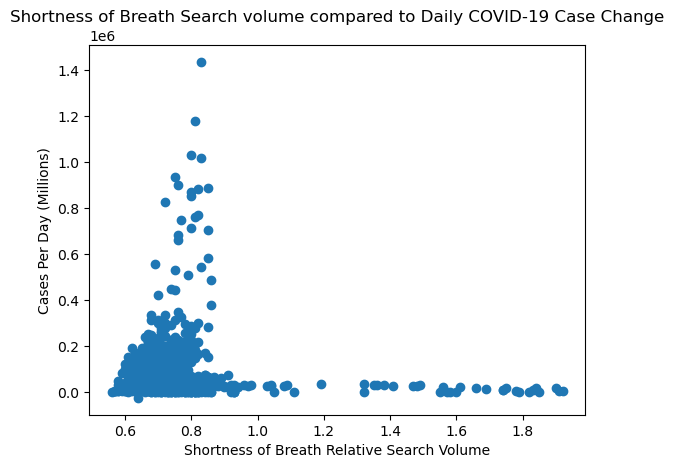

In [11]:
#correlations between shortness of breath and daily cases 
daily_cases = merge_df.iloc[:,3]
shortness = merge_df.iloc[:,5]
correlation = st.pearsonr(shortness,daily_cases)
plt.scatter(shortness,daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Shortness of Breath Relative Search Volume")
plt.title("Shortness of Breath Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.24


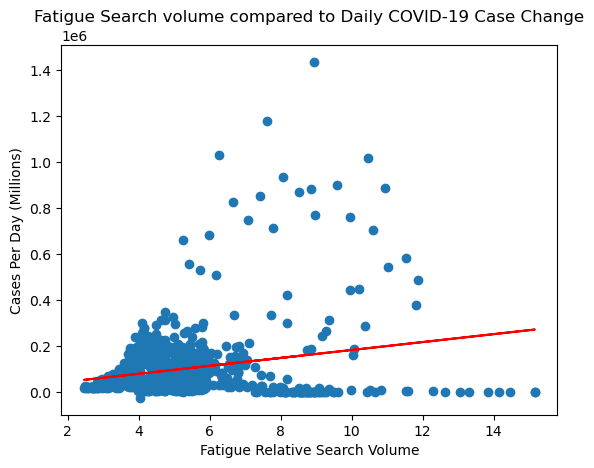

In [12]:
#Daily cases vs fatigue
daily_cases = merge_df.iloc[:,3]
fatigue = merge_df.iloc[:,6]
correlation = st.pearsonr(fatigue, daily_cases)
plt.scatter(fatigue, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Fatigue Relative Search Volume")
plt.title("Fatigue Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

#since this has the second strongest correltation, see if there is a linear regression line that fits well
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(fatigue, daily_cases)
regress_values = fatigue * slope + intercept
plt.plot(fatigue,regress_values,"r-")

#save figure
plt.savefig("../outputs/FatigueCorrelation.png")

#show plot
plt.show()

The correlation between both factors is 0.23


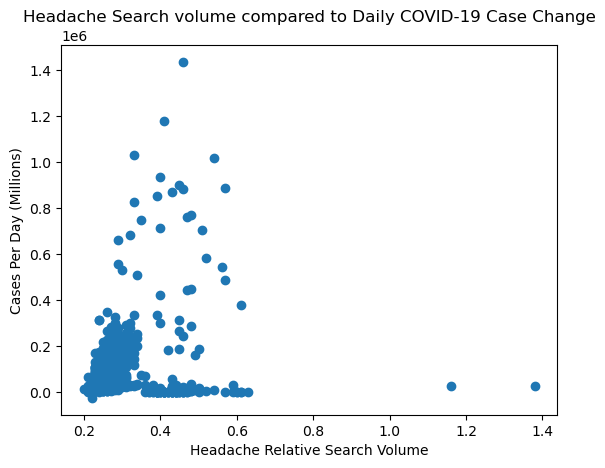

In [13]:
#daily cases vs headache
daily_cases = merge_df.iloc[:,3]
headache = merge_df.iloc[:,7]
correlation = st.pearsonr(headache, daily_cases)
plt.scatter(headache, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Headache Relative Search Volume")
plt.title("Headache Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.12


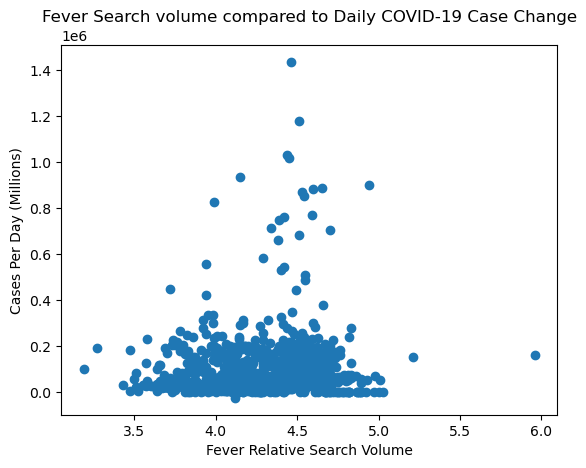

In [14]:
# daily cases vs fever
daily_cases = merge_df.iloc[:,3]
fever = merge_df.iloc[:,8]
correlation = st.pearsonr(fever,daily_cases)
plt.scatter(fever,daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Fever Relative Search Volume")
plt.title("Fever Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.21


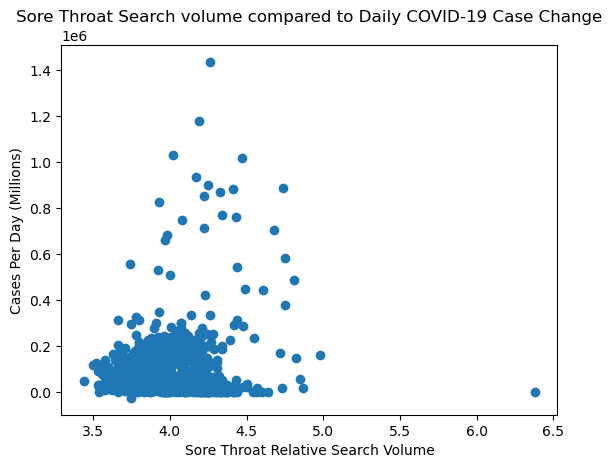

In [15]:
# daily cases vs sore_throat
daily_cases = merge_df.iloc[:,3]
sore_throat = merge_df.iloc[:,9]
correlation = st.pearsonr(sore_throat, daily_cases)
plt.scatter(sore_throat, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Sore Throat Relative Search Volume")
plt.title("Sore Throat Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.1


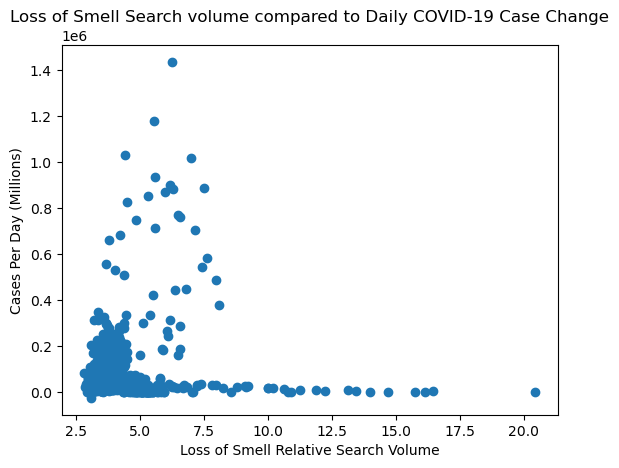

In [16]:
# daily cases vs anosmia (no sense of smell)
daily_cases = merge_df.iloc[:,3]
smell = merge_df.iloc[:,10]
correlation = st.pearsonr(smell, daily_cases)
plt.scatter(smell, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Loss of Smell Relative Search Volume")
plt.title("Loss of Smell Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.29


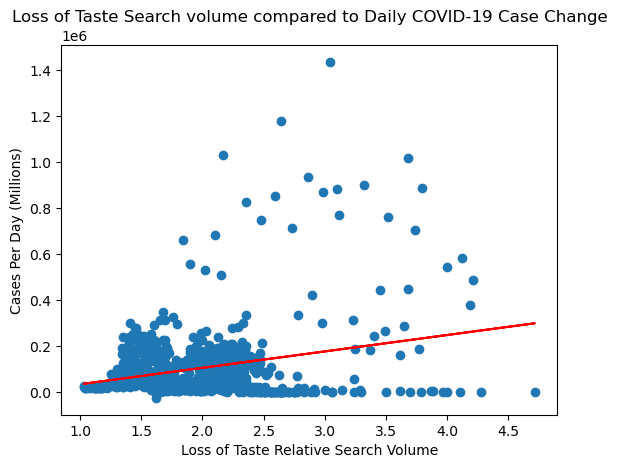

In [17]:
# daily cases vs anosmia (no sense of taste)
daily_cases = merge_df.iloc[:,3]
taste = merge_df.iloc[:,11]
correlation = st.pearsonr(taste, daily_cases)
plt.scatter(taste, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Loss of Taste Relative Search Volume")
plt.title("Loss of Taste Search volume compared to Daily COVID-19 Case Change")
print(f"The correlation between both factors is {round(correlation[0],2)}")

#since this has the strongest correltation, see if there is a linear regression line that fits well
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(taste, daily_cases)
regress_values = taste * slope + intercept
plt.plot(taste,regress_values,"r-")

#save figure
plt.savefig("../outputs/LossofTasteCorrelation.png")

#show figure
plt.show()

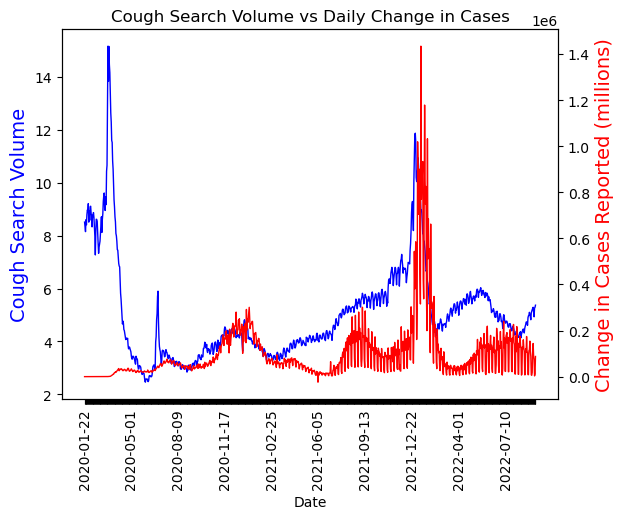

In [18]:
#x and y values
date = merge_df["date"]
cough = merge_df["search_trends_cough"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, cough, linewidth = 1, color = "blue")

#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar

n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Cough Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Cough Search Volume vs Daily Change in Cases")
plt.show()

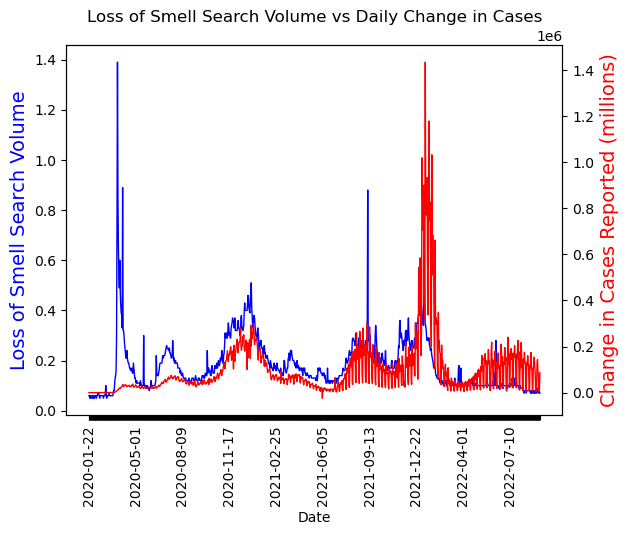

In [19]:
#x and y values
date = merge_df["date"]
smell = merge_df["search_trends_anosmia"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, smell, linewidth = 1, color = "blue")

#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Loss of Smell Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Loss of Smell Search Volume vs Daily Change in Cases")

#save figure
plt.savefig("../outputs/LossofSmellvCases.png")

#show figure
plt.show()

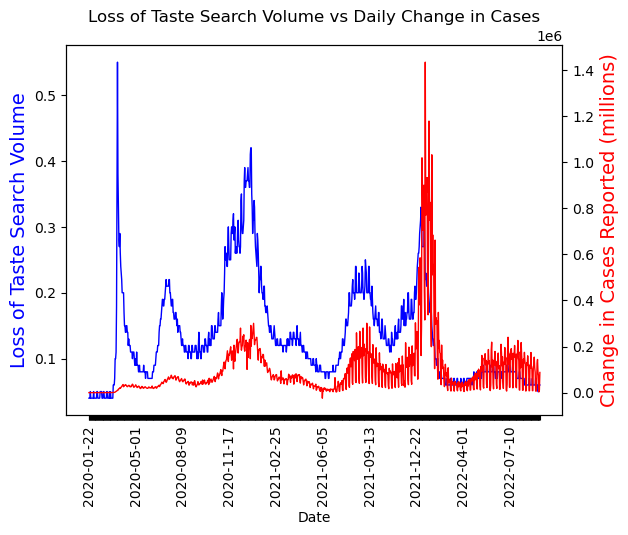

In [20]:
#x and y values
date = merge_df["date"]
taste = merge_df["search_trends_ageusia"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, taste, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Loss of Taste Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Loss of Taste Search Volume vs Daily Change in Cases")

#save figure
plt.savefig("../outputs/LossofTastevCases.png")

#show
plt.show()

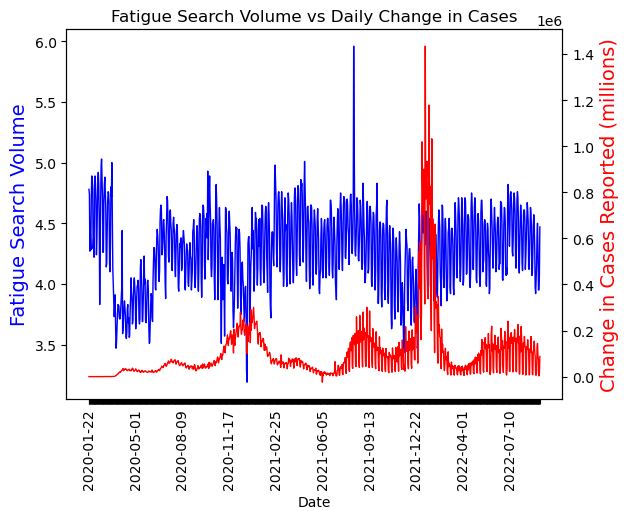

In [21]:
#x and y values
date = merge_df["date"]
fatigue = merge_df["search_trends_fatigue"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, fatigue, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Fatigue Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Fatigue Search Volume vs Daily Change in Cases")
plt.show()

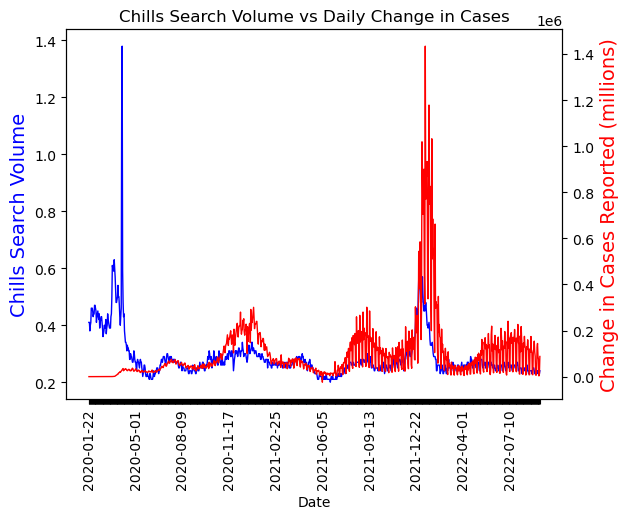

In [22]:
#x and y values
date = merge_df["date"]
chills = merge_df["search_trends_chills"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, chills, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Chills Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Chills Search Volume vs Daily Change in Cases")
plt.show()

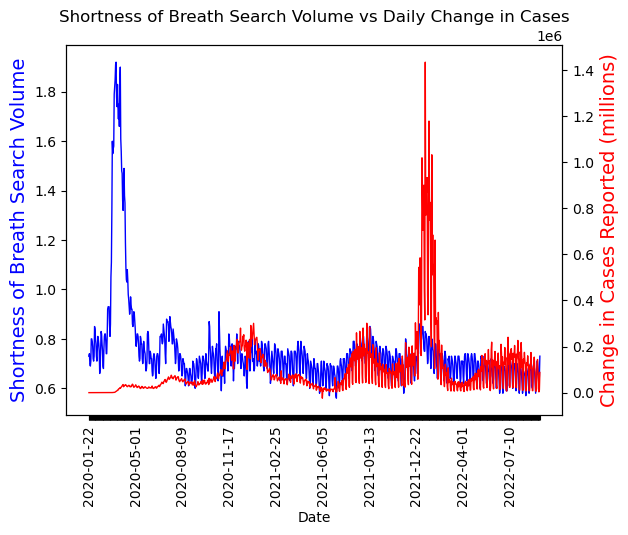

In [23]:
#x and y values
date = merge_df["date"]
shortness = merge_df["search_trends_shortness_of_breath"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, shortness, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Shortness of Breath Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Shortness of Breath Search Volume vs Daily Change in Cases")
plt.show()

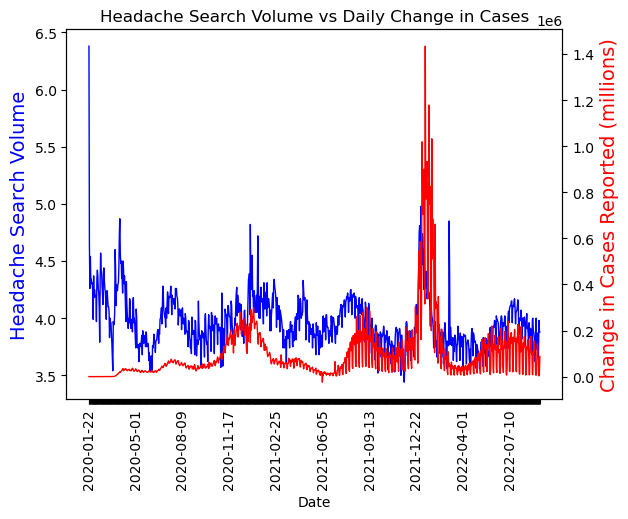

In [24]:
#x and y values
date = merge_df["date"]
headache = merge_df["search_trends_headache"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, headache, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Headache Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Headache Search Volume vs Daily Change in Cases")
plt.show()

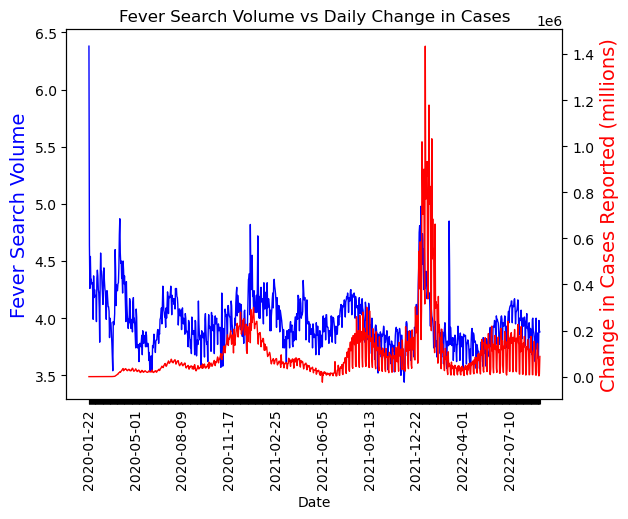

In [25]:
#x and y values
date = merge_df["date"]
fever = merge_df["search_trends_fever"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, headache, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Fever Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Fever Search Volume vs Daily Change in Cases")
plt.show()

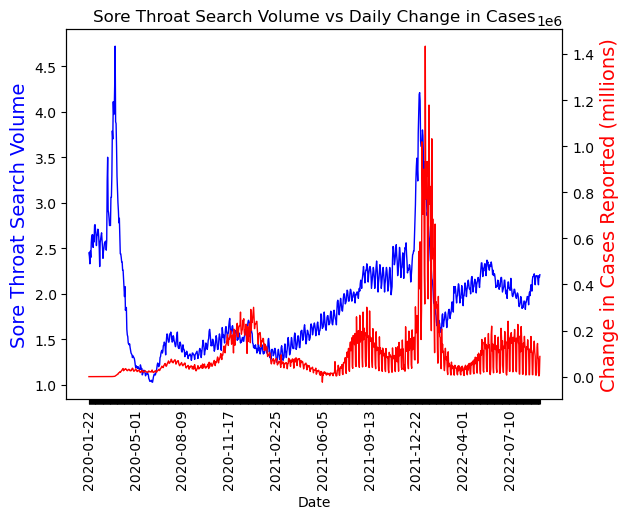

In [26]:
#x and y values
date = merge_df["date"]
sore_throat = merge_df["search_trends_sore_throat"]

#second set of y values
new_hosp = merge_df["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, sore_throat, linewidth = 1, color = "blue")



#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Sore Throat Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Sore Throat Search Volume vs Daily Change in Cases")

#save figure to outputs file
plt.savefig("../outputs/SoreThroatvCases.png")

#show fig
plt.show()


In [18]:
#will looking at only 2021 data give a different result?
merge_df['Year'] =pd.DatetimeIndex(merge_df['date']).year
merge_df['Month'] =pd.DatetimeIndex(merge_df['date']).month

merge_df = merge_df[['date','Month','Year','change_in_cases', 'location_key','search_trends_shortness_of_breath','search_trends_cough','search_trends_chills','search_trends_fatigue','search_trends_headache','search_trends_fever','search_trends_sore_throat','search_trends_anosmia','search_trends_ageusia']]
merge_df.head()

date  Month  Year  change_in_cases location_key  \
0  2020-01-22      1  2020              0.0           US   
1  2020-01-23      1  2020              0.0           US   
2  2020-01-24      1  2020              1.0           US   
3  2020-01-25      1  2020              1.0           US   
4  2020-01-26      1  2020              2.0           US   

   search_trends_shortness_of_breath  search_trends_cough  \
0                               0.73                 8.51   
1                               0.74                 8.33   
2                               0.70                 8.15   
3                               0.69                 8.60   
4                               0.71                 8.41   

   search_trends_chills  search_trends_fatigue  search_trends_headache  \
0                  0.41                   4.78                    6.38   
1                  0.41                   4.74                    4.64   
2                  0.38                   4.27                    4.26   
3                  0.40                   4.41                    4.54   
4                  0.41                   4.28                    4.33   

   search_trends_fever  search_trends_sore_throat  search_trends_anosmia  \
0                 5.02                       2.45                   0.06   
1                 4.91                       2.41                   0.06   
2                 4.72                       2.33                   0.05   
3                 5.06                       2.47                   0.06   
4                 5.16                       2.40                   0.05   

   search_trends_ageusia  
0                   0.04  
1                   0.04  
2                   0.04  
3                   0.05  
4                   0.04

In [19]:
#create 2021 dataset
merge_2021 = merge_df.loc[merge_df['Year'] == 2021]
merge_2021.head()

date  Month  Year  change_in_cases location_key  \
345  2021-01-01      1  2021         147248.0           US   
346  2021-01-02      1  2021         291610.0           US   
347  2021-01-03      1  2021         201780.0           US   
348  2021-01-04      1  2021         251830.0           US   
349  2021-01-05      1  2021         235016.0           US   

     search_trends_shortness_of_breath  search_trends_cough  \
345                               0.69                 4.33   
346                               0.74                 4.49   
347                               0.75                 4.48   
348                               0.80                 4.50   
349                               0.79                 4.47   

     search_trends_chills  search_trends_fatigue  search_trends_headache  \
345                  0.31                   3.85                    4.82   
346                  0.31                   4.15                    4.42   
347                  0.32                   4.24                    4.25   
348                  0.34                   4.48                    4.28   
349                  0.34                   4.63                    4.55   

     search_trends_fever  search_trends_sore_throat  search_trends_anosmia  \
345                 3.56                       1.56                   0.43   
346                 3.71                       1.60                   0.48   
347                 3.76                       1.61                   0.51   
348                 4.01                       1.58                   0.41   
349                 4.09                       1.56                   0.38   

     search_trends_ageusia  
345                   0.41  
346                   0.42  
347                   0.42  
348                   0.35  
349                   0.33

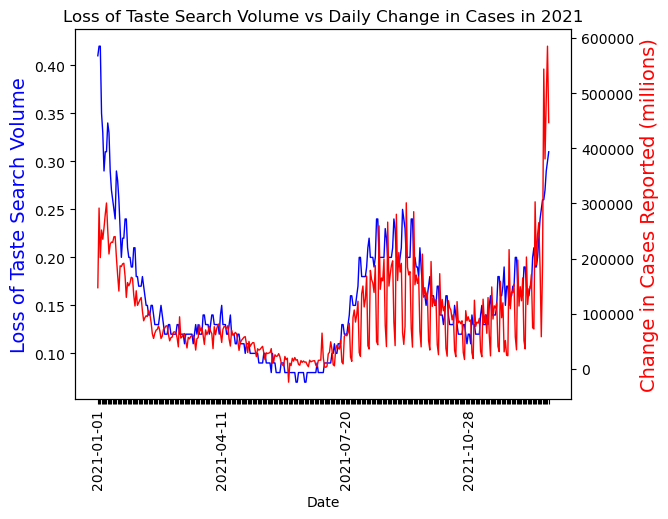

In [20]:
#just 2021 for loss of taste
#x and y values
date = merge_2021["date"]
taste = merge_2021["search_trends_ageusia"]

#second set of y values
new_hosp = merge_2021["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, taste, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Loss of Taste Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Loss of Taste Search Volume vs Daily Change in Cases in 2021")

#save figure
plt.savefig("../outputs/LossofTastevCases.png")

#show
plt.show()

The correlation between both factors is 0.704


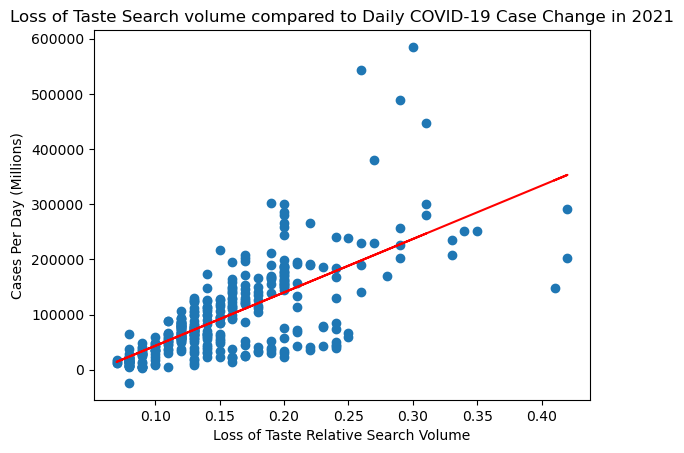

In [36]:
# daily cases vs anosmia (no sense of taste) for 2021
daily_cases = merge_2021.iloc[:,3]
taste = merge_2021.iloc[:,13]
correlation = st.pearsonr(taste, daily_cases)
plt.scatter(taste, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Loss of Taste Relative Search Volume")
plt.title("Loss of Taste Search volume compared to Daily COVID-19 Case Change in 2021")
print(f"The correlation between both factors is {round(correlation[0],3)}")

#since this has the strongest correltation, see if there is a linear regression line that fits well
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(taste, daily_cases)
regress_values = taste * slope + intercept
plt.plot(taste,regress_values,"r-")

#save figure
plt.savefig("../outputs/LossofTasteCorrelation2021.png")

#show figure
plt.show()

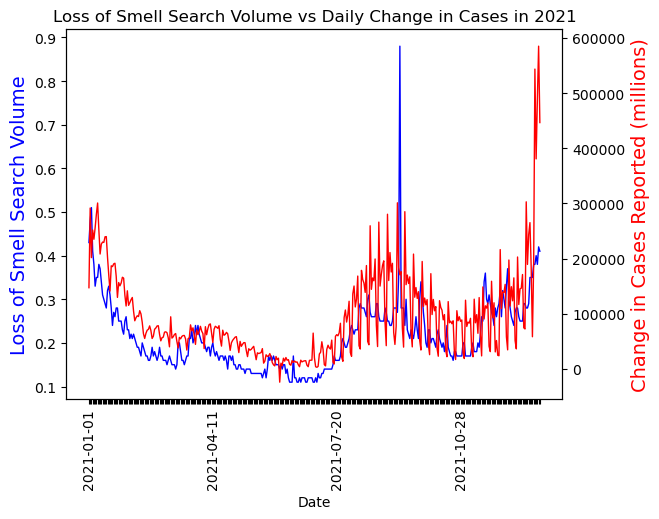

In [33]:
#just 2021 for loss of smell
#x and y values
date = merge_2021["date"]
smell = merge_2021["search_trends_anosmia"]

#second set of y values
new_hosp = merge_2021["change_in_cases"]

#line graph of of shortness of breath searches by date

fig,ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(date, smell, linewidth = 1, color = "blue")


#create a second y-axis citation --> https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
ax2 = ax.twinx()
ax2.plot(date, new_hosp, linewidth = 1, color = "red")

#https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
n = 100 # Keeps every 100th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

#labels 
ax.set_xlabel("Date")
ax.set_ylabel("Loss of Smell Search Volume",color = "blue", fontsize=14)
ax2.set_ylabel("Change in Cases Reported (millions)", color ="red", fontsize=14 )
plt.title("Loss of Smell Search Volume vs Daily Change in Cases in 2021")

#save figure
plt.savefig("../outputs/LossofTastevCases.png")

#show
plt.show()

The correlation between both factors is 0.704


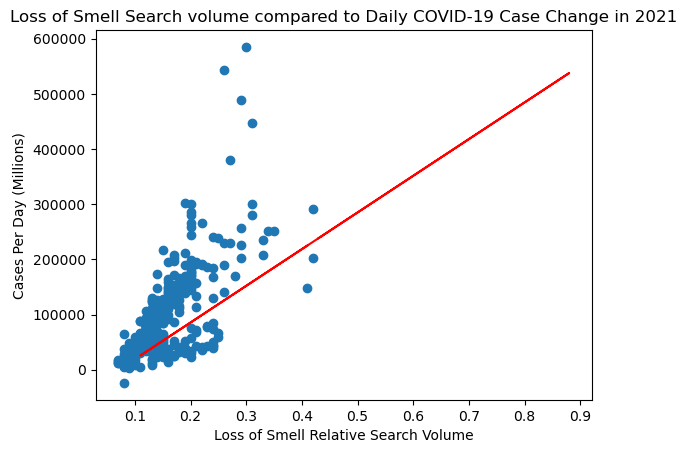

In [37]:
# daily cases vs anosmia (no sense of smell) for 2021
daily_cases = merge_2021.iloc[:,3]
smell = merge_2021.iloc[:,12]
correlation = st.pearsonr(taste, daily_cases)
plt.scatter(taste, daily_cases)
plt.ylabel("Cases Per Day (Millions)")
plt.xlabel("Loss of Smell Relative Search Volume")
plt.title("Loss of Smell Search volume compared to Daily COVID-19 Case Change in 2021")
print(f"The correlation between both factors is {round(correlation[0],3)}")

#since this has the strongest correltation, see if there is a linear regression line that fits well
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(smell, daily_cases)
regress_values = smell * slope + intercept
plt.plot(smell,regress_values,"r-")

#save figure
plt.savefig("../outputs/LossofSmellCorrelation2021.png")

#show figure
plt.show()

# Emma's Code 

In [27]:
#Import and read in US Covid data
covid_file = Path("../Resources/us.csv")
covid_df = pd.read_csv(covid_file)
covid_df.head()

date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0

In [28]:
#Import and read in vaccination search data
vaccination_file = Path("../Resources/vaccination-search-insights.csv")
vaccination_search_df = pd.read_csv(vaccination_file)
vaccination_search_df.head()

date    key  sni_covid19_vaccination  sni_vaccination_intent  \
0  2021-01-04     CA                   33.963                   4.520   
1  2021-01-04  CA_AB                   31.736                   3.774   
2  2021-01-04  CA_BC                   35.991                   4.243   
3  2021-01-04  CA_MB                   35.921                   6.236   
4  2021-01-04  CA_NB                   27.852                   2.853   

   sni_safety_side_effects  
0                    5.881  
1                    5.825  
2                    6.136  
3                    6.335  
4                    4.950

In [29]:
#merge the two US Covid data and Vaccination search data
search_df = pd.merge(covid_df, vaccination_search_df,  on='date')
search_df

date     cases   deaths          key  sni_covid19_vaccination  \
0       2021-01-04  20917269   353743           CA                   33.963   
1       2021-01-04  20917269   353743        CA_AB                   31.736   
2       2021-01-04  20917269   353743        CA_BC                   35.991   
3       2021-01-04  20917269   353743        CA_MB                   35.921   
4       2021-01-04  20917269   353743        CA_NB                   27.852   
...            ...       ...      ...          ...                      ...   
248823  2022-09-05  94563745  1043455  US_WY_56033                    6.886   
248824  2022-09-05  94563745  1043455  US_WY_56035                   10.359   
248825  2022-09-05  94563745  1043455  US_WY_56037                    5.125   
248826  2022-09-05  94563745  1043455  US_WY_56039                   12.755   
248827  2022-09-05  94563745  1043455  US_WY_56041                    3.770   

        sni_vaccination_intent  sni_safety_side_effects  
0                        4.520                    5.881  
1                        3.774                    5.825  
2                        4.243                    6.136  
3                        6.236                    6.335  
4                        2.853                    4.950  
...                        ...                      ...  
248823                     NaN                      NaN  
248824                     NaN                      NaN  
248825                     NaN                      NaN  
248826                   1.822                    0.734  
248827                     NaN                      NaN  

[248828 rows x 7 columns]

In [30]:
#reduce the dataframe down to just US data
us_df = search_df.loc[search_df["key"] == "US"]
us_df.head()

date     cases  deaths key  sni_covid19_vaccination  \
122    2021-01-04  20917269  353743  US                   53.694   
3254   2021-01-11  22675892  376488  US                   68.252   
6379   2021-01-18  24127989  399065  US                   60.840   
9500   2021-01-25  25336637  421126  US                   61.072   
12620  2021-02-01  26363284  443249  US                   56.989   

       sni_vaccination_intent  sni_safety_side_effects  
122                    19.203                    8.406  
3254                   28.211                    8.266  
6379                   25.219                    7.378  
9500                   24.518                    7.711  
12620                  23.223                    7.750

In [31]:
#Create a new variable for the changes in cases and add to the dataframe
us_df["changes_in_cases"] = us_df['cases'] - us_df['cases'].shift(1)
us_df = us_df.dropna(how='any')
us_df

date     cases   deaths key  sni_covid19_vaccination  \
3254    2021-01-11  22675892   376488  US                   68.252   
6379    2021-01-18  24127989   399065  US                   60.840   
9500    2021-01-25  25336637   421126  US                   61.072   
12620   2021-02-01  26363284   443249  US                   56.989   
15733   2021-02-08  27139070   464936  US                   66.057   
...            ...       ...      ...  ..                      ...   
237601  2022-08-08  92079701  1030371  US                    6.900   
239840  2022-08-15  92788886  1033762  US                    6.728   
242064  2022-08-22  93441270  1036961  US                    6.457   
244286  2022-08-29  94063866  1040297  US                    8.658   
246588  2022-09-05  94563745  1043455  US                   11.962   

        sni_vaccination_intent  sni_safety_side_effects  changes_in_cases  
3254                    28.211                    8.266         1758623.0  
6379                    25.219                    7.378         1452097.0  
9500                    24.518                    7.711         1208648.0  
12620                   23.223                    7.750         1026647.0  
15733                   30.287                   10.835          775786.0  
...                        ...                      ...               ...  
237601                   0.845                    0.835          788445.0  
239840                   0.757                    0.787          709185.0  
242064                   0.663                    0.747          652384.0  
244286                   1.258                    0.681          622596.0  
246588                   2.358                    0.861          499879.0  

[87 rows x 8 columns]

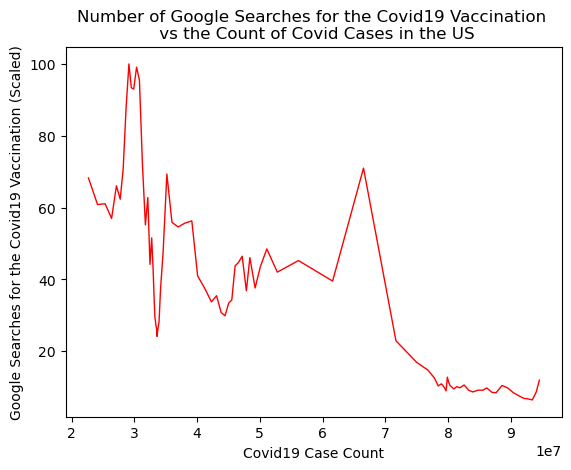

In [32]:
#Create a scatter plot of the number of searches by the case count
plt.plot(us_df["cases"], us_df["sni_covid19_vaccination"], linewidth=1, color='r')
plt.title("Number of Google Searches for the Covid19 Vaccination \n vs the Count of Covid Cases in the US")
plt.xlabel("Covid19 Case Count")
plt.ylabel("Google Searches for the Covid19 Vaccination (Scaled)")
plt.show()

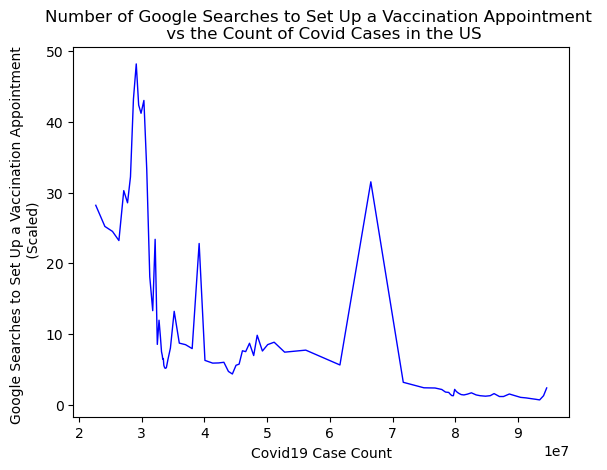

In [33]:
#Create a scatter plot of the number of searches to mak a vaccine appointment by the case count
plt.plot(us_df["cases"], us_df["sni_vaccination_intent"], linewidth=1, color='b')
plt.title("Number of Google Searches to Set Up a Vaccination Appointment \n vs the Count of Covid Cases in the US")
plt.xlabel("Covid19 Case Count")
plt.ylabel("Google Searches to Set Up a Vaccination Appointment \n (Scaled)")
plt.show()

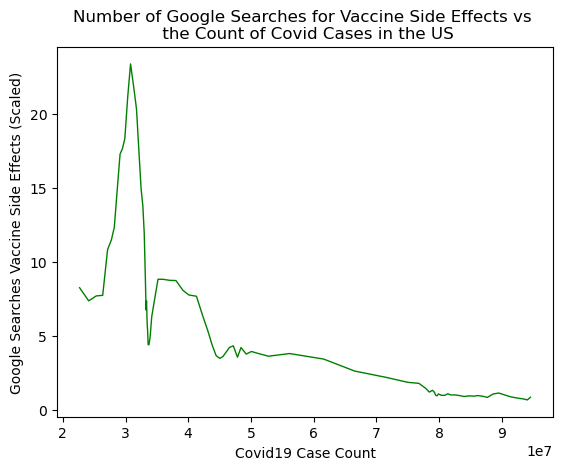

In [34]:
##Create a scatter plot of the number of searches for vaccine side effects by the case count
plt.plot(us_df["cases"], us_df["sni_safety_side_effects"], linewidth=1, color='g')
plt.title("Number of Google Searches for Vaccine Side Effects vs \n the Count of Covid Cases in the US")
plt.xlabel("Covid19 Case Count")
plt.ylabel("Google Searches Vaccine Side Effects (Scaled)")
plt.show()

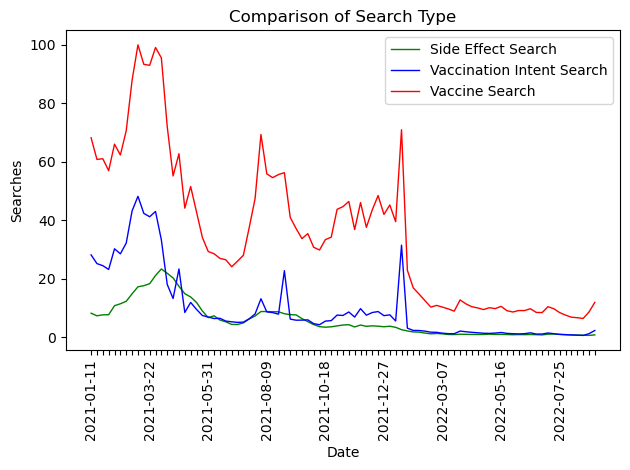

In [35]:
#comparison of all 3 above charts
fig, ax1 = plt.subplots()

SideEffect, = plt.plot(us_df["date"], us_df["sni_safety_side_effects"], linewidth=1, color='g', label="Side Effect Search")
VaccinationIntent, = plt.plot(us_df["date"], us_df["sni_vaccination_intent"], linewidth=1, color='b', label="Vaccination Intent Search")
Vaccine, = plt.plot(us_df["date"], us_df["sni_covid19_vaccination"], linewidth=1, color='r', label="Vaccine Search")
plt.title("Comparison of Search Type")
plt.xlabel("Date")
plt.ylabel("Searches")

plt.legend(handles=[SideEffect, VaccinationIntent, Vaccine], loc="upper right")

n = 10
plt.xticks(rotation = 90)
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

fig.tight_layout()
plt.savefig("../outputs/SearchComparison.png")
plt.show()

In [36]:
#Import Vaccination data and read it in
vac_file = Path("../Resources/vaccinations.csv")
vac_df = pd.read_csv(vac_file)
vac_df = vac_df.rename(columns={'location_key': 'key'})
vac_df.head()

date key  new_persons_vaccinated  cumulative_persons_vaccinated  \
0  2021-01-25  AD                     NaN                          576.0   
1  2021-02-01  AD                   460.0                         1036.0   
2  2021-02-10  AD                   255.0                         1291.0   
3  2021-02-12  AD                   331.0                         1622.0   
4  2021-02-19  AD                   519.0                         2141.0   

   new_persons_fully_vaccinated  cumulative_persons_fully_vaccinated  \
0                           NaN                                  NaN   
1                           NaN                                  NaN   
2                           NaN                                  NaN   
3                           NaN                                  NaN   
4                           NaN                                  NaN   

   new_vaccine_doses_administered  cumulative_vaccine_doses_administered  \
0                             NaN                                  576.0   
1                           460.0                                 1036.0   
2                           255.0                                 1291.0   
3                           331.0                                 1622.0   
4                           519.0                                 2141.0   

   new_persons_vaccinated_pfizer  cumulative_persons_vaccinated_pfizer  ...  \
0                            NaN                                   NaN  ...   
1                            NaN                                   NaN  ...   
2                            NaN                                   NaN  ...   
3                            NaN                                   NaN  ...   
4                            NaN                                   NaN  ...   

   new_persons_fully_vaccinated_janssen  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   cumulative_persons_fully_vaccinated_janssen  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   new_vaccine_doses_administered_janssen  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   cumulative_vaccine_doses_administered_janssen  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   new_persons_vaccinated_sinovac  total_persons_vaccinated_sinovac  \
0                             NaN                               NaN   
1                             NaN                               NaN   
2                             NaN                               NaN   
3                             NaN                               NaN   
4                             NaN                               NaN   

   new_persons_fully_vaccinated_sinovac  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   total_persons_fully_vaccinated_sinovac  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   new_vaccine_doses_administered_sinovac  \
0                                     NaN

In [37]:
#Merge the two dataframes
vac_merge = pd.merge(us_df, vac_df,  on=['key', 'date'])
vac_merge = vac_merge.reset_index()
vac_merge.head()

index        date     cases  deaths key  sni_covid19_vaccination  \
0      0  2021-01-11  22675892  376488  US                   68.252   
1      1  2021-01-18  24127989  399065  US                   60.840   
2      2  2021-01-25  25336637  421126  US                   61.072   
3      3  2021-02-01  26363284  443249  US                   56.989   
4      4  2021-02-08  27139070  464936  US                   66.057   

   sni_vaccination_intent  sni_safety_side_effects  changes_in_cases  \
0                  28.211                    8.266         1758623.0   
1                  25.219                    7.378         1452097.0   
2                  24.518                    7.711         1208648.0   
3                  23.223                    7.750         1026647.0   
4                  30.287                   10.835          775786.0   

   new_persons_vaccinated  ...  new_persons_fully_vaccinated_janssen  \
0                723451.0  ...                                   NaN   
1                642337.0  ...                                   NaN   
2                860420.0  ...                                   NaN   
3                776442.0  ...                                   NaN   
4                837563.0  ...                                   NaN   

   cumulative_persons_fully_vaccinated_janssen  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   new_vaccine_doses_administered_janssen  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   cumulative_vaccine_doses_administered_janssen  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   new_persons_vaccinated_sinovac  total_persons_vaccinated_sinovac  \
0                             NaN                               NaN   
1                             NaN                               NaN   
2                             NaN                               NaN   
3                             NaN                               NaN   
4                             NaN                               NaN   

   new_persons_fully_vaccinated_sinovac  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   total_persons_fully_vaccinated_sinovac  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   new_vaccine_doses_administered_sinovac  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   total_vaccine_doses_administered_sinovac  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  

[5 rows x 39 columns]

In [38]:
#Look at variable counts
vac_merge.count()

index                                            87
date                                             87
cases                                            87
deaths                                           87
key                                              87
sni_covid19_vaccination                          87
sni_vaccination_intent                           87
sni_safety_side_effects                          87
changes_in_cases                                 87
new_persons_vaccinated                           87
cumulative_persons_vaccinated                    87
new_persons_fully_vaccinated                     87
cumulative_persons_fully_vaccinated              87
new_vaccine_doses_administered                   87
cumulative_vaccine_doses_administered            87
new_persons_vaccinated_pfizer                     0
cumulative_persons_vaccinated_pfizer              0
new_persons_fully_vaccinated_pfizer              76
cumulative_persons_fully_vaccinated_pfizer       77
new_vaccine_

In [39]:
#Remove columns that don't contain data
columns_to_delete = ['total_vaccine_doses_administered_sinovac', 'new_vaccine_doses_administered_sinovac', 'total_persons_fully_vaccinated_sinovac',
                     'new_persons_fully_vaccinated_sinovac', 'total_persons_vaccinated_sinovac', 'new_persons_vaccinated_sinovac', 
                     'cumulative_persons_vaccinated_janssen', 'new_persons_vaccinated_janssen', 'cumulative_persons_vaccinated_moderna', 
                     'new_persons_vaccinated_moderna', 'cumulative_persons_vaccinated_pfizer', 'new_persons_vaccinated_pfizer']
vac_merge = vac_merge.drop(columns=columns_to_delete)
vac_merge.count()

index                                            87
date                                             87
cases                                            87
deaths                                           87
key                                              87
sni_covid19_vaccination                          87
sni_vaccination_intent                           87
sni_safety_side_effects                          87
changes_in_cases                                 87
new_persons_vaccinated                           87
cumulative_persons_vaccinated                    87
new_persons_fully_vaccinated                     87
cumulative_persons_fully_vaccinated              87
new_vaccine_doses_administered                   87
cumulative_vaccine_doses_administered            87
new_persons_fully_vaccinated_pfizer              76
cumulative_persons_fully_vaccinated_pfizer       77
new_vaccine_doses_administered_pfizer            76
cumulative_vaccine_doses_administered_pfizer     77
new_persons_

In [40]:
#remove N/As and replace with 0
vac_merge.fillna(0, inplace=True)
vac_merge.count()

index                                            87
date                                             87
cases                                            87
deaths                                           87
key                                              87
sni_covid19_vaccination                          87
sni_vaccination_intent                           87
sni_safety_side_effects                          87
changes_in_cases                                 87
new_persons_vaccinated                           87
cumulative_persons_vaccinated                    87
new_persons_fully_vaccinated                     87
cumulative_persons_fully_vaccinated              87
new_vaccine_doses_administered                   87
cumulative_vaccine_doses_administered            87
new_persons_fully_vaccinated_pfizer              87
cumulative_persons_fully_vaccinated_pfizer       87
new_vaccine_doses_administered_pfizer            87
cumulative_vaccine_doses_administered_pfizer     87
new_persons_

In [41]:
#Remove the last two rows of data because they did not contain count information
vac_merge
vac_merge.drop([85,86], axis=0, inplace=True)
vac_merge

index        date     cases   deaths key  sni_covid19_vaccination  \
0       0  2021-01-11  22675892   376488  US                   68.252   
1       1  2021-01-18  24127989   399065  US                   60.840   
2       2  2021-01-25  25336637   421126  US                   61.072   
3       3  2021-02-01  26363284   443249  US                   56.989   
4       4  2021-02-08  27139070   464936  US                   66.057   
..    ...         ...       ...      ...  ..                      ...   
80     80  2022-07-25  90412575  1023855  US                    8.477   
81     81  2022-08-01  91291256  1026937  US                    7.608   
82     82  2022-08-08  92079701  1030371  US                    6.900   
83     83  2022-08-15  92788886  1033762  US                    6.728   
84     84  2022-08-22  93441270  1036961  US                    6.457   

    sni_vaccination_intent  sni_safety_side_effects  changes_in_cases  \
0                   28.211                    8.266         1758623.0   
1                   25.219                    7.378         1452097.0   
2                   24.518                    7.711         1208648.0   
3                   23.223                    7.750         1026647.0   
4                   30.287                   10.835          775786.0   
..                     ...                      ...               ...   
80                   1.024                    1.023          898141.0   
81                   0.948                    0.904          878681.0   
82                   0.845                    0.835          788445.0   
83                   0.757                    0.787          709185.0   
84                   0.663                    0.747          652384.0   

    new_persons_vaccinated  ...  new_vaccine_doses_administered_pfizer  \
0                 723451.0  ...                                    0.0   
1                 642337.0  ...                                    0.0   
2                 860420.0  ...                                    0.0   
3                 776442.0  ...                                    0.0   
4                 837563.0  ...                                    0.0   
..                     ...  ...                                    ...   
80                 60998.0  ...                                    0.0   
81                 53044.0  ...                                    0.0   
82                 49328.0  ...                                    0.0   
83                 45217.0  ...                                    0.0   
84                 40130.0  ...                                    0.0   

    cumulative_vaccine_doses_administered_pfizer  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
80                                   355396322.0   
81                                   356743474.0   
82                                   357149149.0   
83                                   358354212.0   
84                                   359289983.0   

    new_persons_fully_vaccinated_moderna  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
..                                   ...   
80                                   0.0   
81                                   0.0   
82                                   0.0   
83                                   0.0   
84                                   0.0   

    cumulative_persons_fully_vaccinated_moderna  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3  

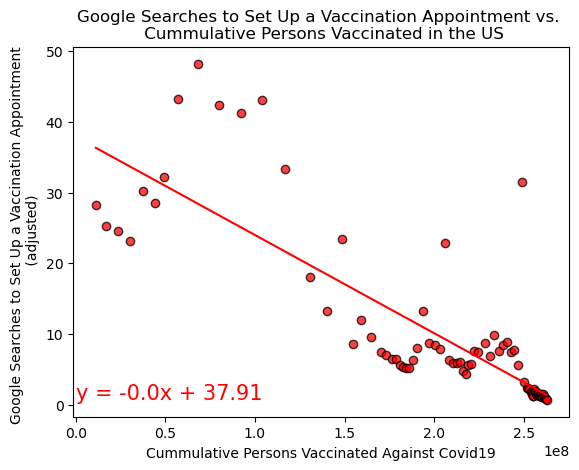

The slope is: -1.390054930320458e-07
The r value is: -0.8284724213025386


In [42]:
#Create a scatter plot comparing vaccination appointment search to cumulative persons vaccinated and include regression line
plt.scatter(vac_merge["cumulative_persons_vaccinated"], vac_merge["sni_vaccination_intent"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(vac_merge["cumulative_persons_vaccinated"], vac_merge["sni_vaccination_intent"])
regress_values = vac_merge["cumulative_persons_vaccinated"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(vac_merge["cumulative_persons_vaccinated"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Create graph labels
plt.xlabel('Cummulative Persons Vaccinated Against Covid19')
plt.ylabel('Google Searches to Set Up a Vaccination Appointment \n (adjusted)')
plt.title('Google Searches to Set Up a Vaccination Appointment vs. \n Cummulative Persons Vaccinated in the US')

#Save and show figure
plt.savefig("../outputs/AppointmentCumVaccinated.png")
plt.show()

#Slope is rounded to zero due scale differences between the x- and y-axis
print("The slope is: " + str(slope))

print("The r value is: " + str(rvalue))

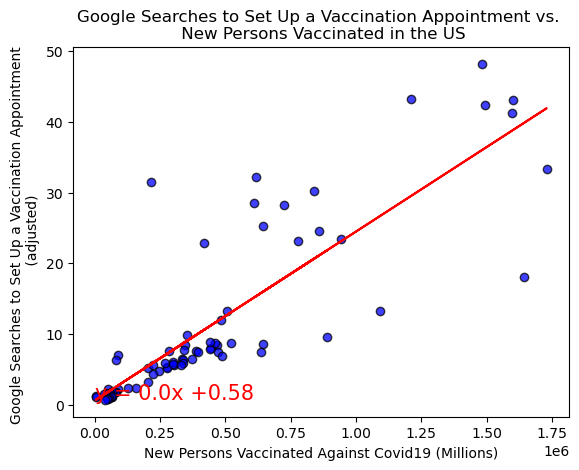

The slope is: 2.391252123441851e-05
The r value is: 0.8540985445683952


In [43]:
#Create a scatter plot comparing vaccination appointment search to new persons vaccinated and include regression line
plt.scatter(vac_merge["new_persons_vaccinated"], vac_merge["sni_vaccination_intent"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(vac_merge["new_persons_vaccinated"], vac_merge["sni_vaccination_intent"])
regress_values = vac_merge["new_persons_vaccinated"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(vac_merge["new_persons_vaccinated"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Create labels for graph
plt.xlabel('New Persons Vaccinated Against Covid19 (Millions)')
plt.ylabel('Google Searches to Set Up a Vaccination Appointment \n (adjusted)')
plt.title('Google Searches to Set Up a Vaccination Appointment vs. \n New Persons Vaccinated in the US')
plt.savefig("../outputs/AppointmentNewVaccinated.png")

#Display graph
plt.show()

#Slope is rounded to zero due scale differences between the x- and y-axis
print("The slope is: " + str(slope))

print("The r value is: " + str(rvalue))

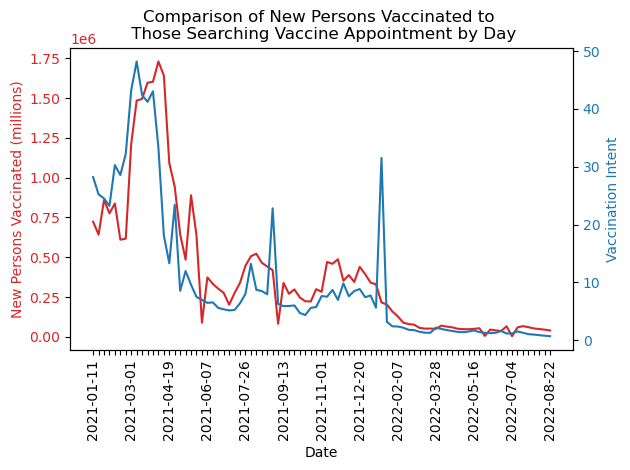

In [44]:
#Source: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
#Compare the new persons vaccinated and vaccination intent by day

x_axis = np.array(vac_merge["date"])
new_vaccinations = vac_merge["new_persons_vaccinated"]
vac_intent = vac_merge["sni_vaccination_intent"]

#Create two different y-axis scales to account for unit size difference
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Vaccinated (millions)", color=color)
ax1.plot(x_axis, new_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
n = 7 #Show every 7th tick mark
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Vaccination Intent', color=color)
ax2.plot(x_axis, vac_intent, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of New Persons Vaccinated to \n Those Searching Vaccine Appointment by Day")

fig.tight_layout()
plt.savefig("../outputs/VaccinatedAppointmentDate.png")
plt.show()

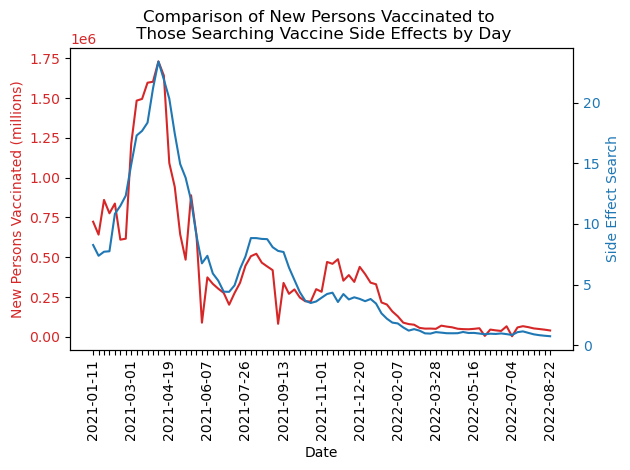

In [45]:
#Compare the new persons vaccinated and side effect searches by day
x_axis = np.array(vac_merge["date"])
new_vaccinations = vac_merge["new_persons_vaccinated"]
side_effect_search = vac_merge["sni_safety_side_effects"]

#Create two different y-axis scales to account for unit size difference
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Vaccinated (millions)", color=color)
ax1.plot(x_axis, new_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
n = 7 #Show every 7th tick mark
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Side Effect Search', color=color)
ax2.plot(x_axis, side_effect_search, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of New Persons Vaccinated to \n Those Searching Vaccine Side Effects by Day")

fig.tight_layout()
plt.savefig("../outputs/VaccinatedSideEffectDate.png")
plt.show()

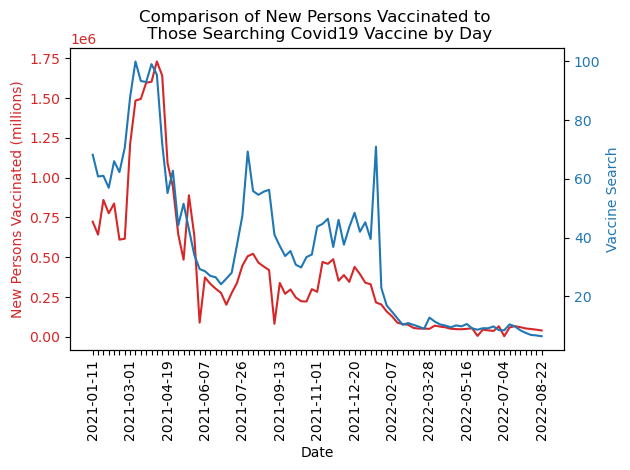

In [46]:
#Compare the new persons vaccinated and vaccine search by day
x_axis = np.array(vac_merge["date"])
new_vaccinations = vac_merge["new_persons_vaccinated"]
vac_search = vac_merge["sni_covid19_vaccination"]

#Create two different y-axis scales to account for unit size difference
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Vaccinated (millions)", color=color)
ax1.plot(x_axis, new_vaccinations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 90)
n = 7 #Show every 7th tick mark
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Vaccine Search', color=color)
ax2.plot(x_axis, vac_search, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of New Persons Vaccinated to \n Those Searching Covid19 Vaccine by Day")

#Show every 25th tick mark
fig.tight_layout()
plt.savefig("../outputs/VaccinatedSearchDate.png")
plt.show()

In [47]:
#Create varibles for total count fully vaccinated persons per vaccine type
total_janssen = vac_merge["cumulative_persons_fully_vaccinated_janssen"][84]
print(total_janssen)
total_moderna = vac_merge["cumulative_persons_fully_vaccinated_moderna"][84]
print(total_moderna)
total_pfizer = vac_merge["cumulative_persons_fully_vaccinated_pfizer"][84]
print(total_pfizer)
total_vaccinatated = vac_merge["cumulative_persons_fully_vaccinated"][84]
print(total_vaccinatated)
print(total_janssen + total_moderna + total_pfizer)

17072904.0
77738220.0
128685014.0
223684995.0
223496138.0


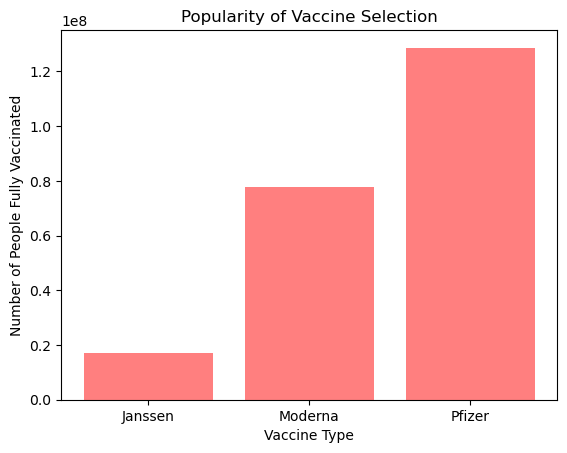

In [48]:
#Create a bar graph to compare vaccine popularity
vaccinated = [total_janssen, total_moderna, total_pfizer]
x_axis = np.arange(len(vaccinated))
plt.bar(x_axis, vaccinated, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Janssen", "Moderna", "Pfizer"])
plt.title("Popularity of Vaccine Selection")
plt.xlabel("Vaccine Type")
plt.ylabel("Number of People Fully Vaccinated")
plt.savefig("../outputs/VaccineSelectionBar.png")
plt.show()

In [49]:
#Create variables to represent percentage of vaccine selection
percent_janssen = total_janssen/total_vaccinatated
percent_moderna = total_moderna/total_vaccinatated
percent_pfizer = total_pfizer/total_vaccinatated
percent_other = (total_vaccinatated - (total_janssen + total_moderna + total_pfizer))/total_vaccinatated
print(percent_janssen, percent_moderna, percent_pfizer, percent_other)

0.07632565608614024 0.34753435294128693 0.5752956920512259 0.0008442989213469594


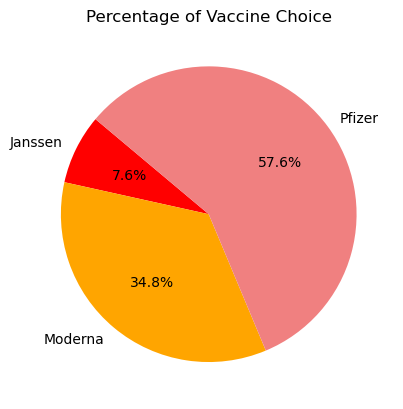

In [50]:
#Create a pie chart of vaccine selection
labels = ["Janssen", "Moderna", "Pfizer"]
sizes = [percent_janssen, percent_moderna, percent_pfizer]
colors = ["red", "orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Vaccine Choice")
plt.savefig("../outputs/VaccinateSelectionPie.png")
plt.show()

In [51]:
#Create a dataframe of the observed vaccine selection
observed = pd.Series([total_janssen, total_moderna, total_pfizer], index=["Janssen", "Moderna", "Pfizer"])
vaccinated_df = pd.DataFrame([observed]).T

In [52]:
#Add the expected value of selection per vaccine to a new column
vaccinated_df[1] = (total_janssen + total_moderna + total_pfizer)/3
vaccinated_df.columns = ["Observed", "Expected"]
vaccinated_df

Observed      Expected
Janssen   17072904.0  7.449871e+07
Moderna   77738220.0  7.449871e+07
Pfizer   128685014.0  7.449871e+07

In [53]:
#Find the critical value when alpha = 0.05 and degrees of freedom = 2
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [54]:
#Perform a Chi Square analysis
stats.chisquare(vaccinated_df['Observed'], vaccinated_df['Expected'])

Power_divergenceResult(statistic=83818537.76332542, pvalue=0.0)

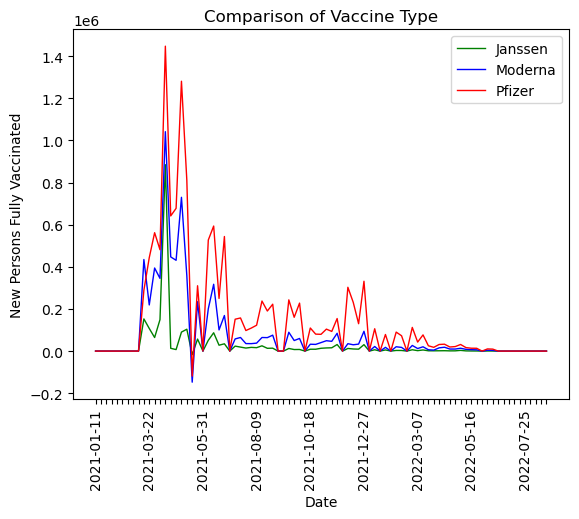

In [55]:
#Create a comparison of vaccine choice
fig, ax1 = plt.subplots()

Janssen, = plt.plot(vac_merge["date"], vac_merge["new_persons_fully_vaccinated_janssen"], linewidth=1, color='g', label="Janssen")
Moderna, = plt.plot(vac_merge["date"], vac_merge["new_persons_fully_vaccinated_moderna"], linewidth=1, color='b', label="Moderna")
Pfizer, = plt.plot(vac_merge["date"], vac_merge["new_persons_fully_vaccinated_pfizer"], linewidth=1, color='r', label="Pfizer")
plt.title("Comparison of Vaccine Type")
plt.xlabel("Date")
plt.ylabel("New Persons Fully Vaccinated")

plt.legend(handles=[Janssen, Moderna, Pfizer], loc="upper right")

n = 10
plt.xticks(rotation = 90)
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]


plt.savefig("../outputs/DoseTypeComparison.png")
plt.show()

In [56]:
#Press release of potential blood clotting effect in J&J vaccine: https://www.cdc.gov/media/releases/2021/s0413-JJ-vaccine.html
vac_merge.dtypes

index                                              int64
date                                              object
cases                                              int64
deaths                                             int64
key                                               object
sni_covid19_vaccination                          float64
sni_vaccination_intent                           float64
sni_safety_side_effects                          float64
changes_in_cases                                 float64
new_persons_vaccinated                           float64
cumulative_persons_vaccinated                    float64
new_persons_fully_vaccinated                     float64
cumulative_persons_fully_vaccinated              float64
new_vaccine_doses_administered                   float64
cumulative_vaccine_doses_administered            float64
new_persons_fully_vaccinated_pfizer              float64
cumulative_persons_fully_vaccinated_pfizer       float64
new_vaccine_doses_administered_

In [57]:
vac_merge[["Year", "Month", "Day"]] = vac_merge["date"].str.split("-", expand=True)
vac_merge.head()

index        date     cases  deaths key  sni_covid19_vaccination  \
0      0  2021-01-11  22675892  376488  US                   68.252   
1      1  2021-01-18  24127989  399065  US                   60.840   
2      2  2021-01-25  25336637  421126  US                   61.072   
3      3  2021-02-01  26363284  443249  US                   56.989   
4      4  2021-02-08  27139070  464936  US                   66.057   

   sni_vaccination_intent  sni_safety_side_effects  changes_in_cases  \
0                  28.211                    8.266         1758623.0   
1                  25.219                    7.378         1452097.0   
2                  24.518                    7.711         1208648.0   
3                  23.223                    7.750         1026647.0   
4                  30.287                   10.835          775786.0   

   new_persons_vaccinated  ...  cumulative_persons_fully_vaccinated_moderna  \
0                723451.0  ...                                          0.0   
1                642337.0  ...                                          0.0   
2                860420.0  ...                                          0.0   
3                776442.0  ...                                          0.0   
4                837563.0  ...                                          0.0   

   new_vaccine_doses_administered_moderna  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   cumulative_vaccine_doses_administered_moderna  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   new_persons_fully_vaccinated_janssen  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   cumulative_persons_fully_vaccinated_janssen  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   new_vaccine_doses_administered_janssen  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   cumulative_vaccine_doses_administered_janssen  Year  Month  Day  
0                                            0.0  2021     01   11  
1                                            0.0  2021     01   18  
2                                            0.0  2021     01   25  
3                                            0.0  2021     02   01  
4                                            0.0  2021     02   08  

[5 rows x 30 columns]

In [58]:
#Create a new dataframe that only contains data from April 2021
year2021 = vac_merge.loc[vac_merge["Year"] == "2021"]
April2021 = year2021.loc[year2021["Month"] == "04"]
April2021.dtypes

index                                              int64
date                                              object
cases                                              int64
deaths                                             int64
key                                               object
sni_covid19_vaccination                          float64
sni_vaccination_intent                           float64
sni_safety_side_effects                          float64
changes_in_cases                                 float64
new_persons_vaccinated                           float64
cumulative_persons_vaccinated                    float64
new_persons_fully_vaccinated                     float64
cumulative_persons_fully_vaccinated              float64
new_vaccine_doses_administered                   float64
cumulative_vaccine_doses_administered            float64
new_persons_fully_vaccinated_pfizer              float64
cumulative_persons_fully_vaccinated_pfizer       float64
new_vaccine_doses_administered_

In [59]:
#View new dataframe
April2021

index        date     cases  deaths key  sni_covid19_vaccination  \
12     12  2021-04-05  30802221  555129  US                   95.537   
13     13  2021-04-12  31283990  562027  US                   72.037   
14     14  2021-04-19  31754642  567317  US                   55.185   
15     15  2021-04-26  32139580  572259  US                   62.795   

    sni_vaccination_intent  sni_safety_side_effects  changes_in_cases  \
12                  33.291                   23.391          453505.0   
13                  18.095                   21.906          481769.0   
14                  13.297                   20.327          470652.0   
15                  23.396                   17.461          384938.0   

    new_persons_vaccinated  ...  cumulative_persons_fully_vaccinated_moderna  \
12               1730288.0  ...                                   27126618.0   
13               1641822.0  ...                                   31014082.0   
14               1092072.0  ...                                   35439161.0   
15                942921.0  ...                                   39855028.0   

    new_vaccine_doses_administered_moderna  \
12                                752279.0   
13                               2072210.0   
14                                820978.0   
15                                798607.0   

    cumulative_vaccine_doses_administered_moderna  \
12                                     76791212.0   
13                                     84694388.0   
14                                     93002433.0   
15                                    100830533.0   

    new_persons_fully_vaccinated_janssen  \
12                              149318.0   
13                              884558.0   
14                               13216.0   
15                                7196.0   

    cumulative_persons_fully_vaccinated_janssen  \
12                                    4176893.0   
13                                    6820188.0   
14                                    7896144.0   
15                                    8021694.0   

    new_vaccine_doses_administered_janssen  \
12                                149926.0   
13                                887776.0   
14                                 13472.0   
15                                  7406.0   

    cumulative_vaccine_doses_administered_janssen  Year  Month  Day  
12                                      4204015.0  2021     04   05  
13                                      6859877.0  2021     04   12  
14                                      7949021.0  2021     04   19  
15                                      8087269.0  2021     04   26  

[4 rows x 30 columns]

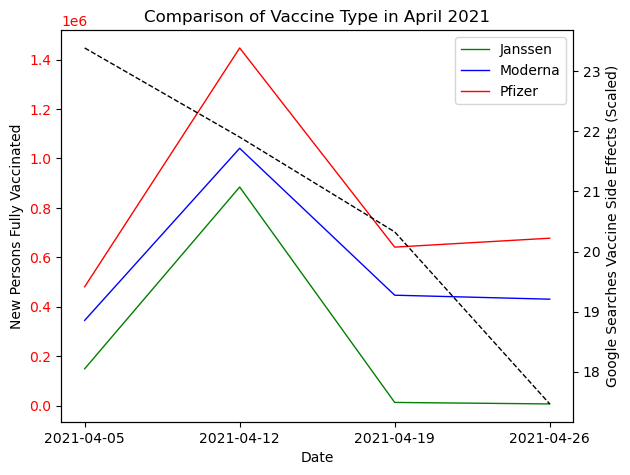

In [60]:
#Compare vaccine choice before and after J&J 
fig, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("New Persons Fully Vaccinated")
Janssen, = ax1.plot(April2021["date"], April2021["new_persons_fully_vaccinated_janssen"], linewidth=1, color='g', label="Janssen")
Moderna, = ax1.plot(April2021["date"], April2021["new_persons_fully_vaccinated_moderna"], linewidth=1, color='b', label="Moderna")
Pfizer, = ax1.plot(April2021["date"], April2021["new_persons_fully_vaccinated_pfizer"], linewidth=1, color='r', label="Pfizer")
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel("Google Searches Vaccine Side Effects (Scaled)")
ax2.plot(April2021["date"], April2021["sni_safety_side_effects"], linewidth=1, color='black', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='black')

plt.legend(handles=[Janssen, Moderna, Pfizer], loc="upper right")

fig.tight_layout()
plt.title("Comparison of Vaccine Type in April 2021")
plt.savefig("../outputs/April2021.png")
plt.show()

# Maggy's Code

In [61]:
#import databases 

cases_path = "../Resources/us.csv"


cases_df = pd.read_csv(cases_path)
cases_df.head()

date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0

In [62]:
#Filter for US Data 

us_searches_df = trends_df.loc[trends_df['location_key'] == 'US']
us_searches_df.head()

date location_key  search_trends_abdominal_obesity  \
12818  2020-01-01           US                             2.42   
12819  2020-01-02           US                             2.40   
12820  2020-01-03           US                             2.13   
12821  2020-01-04           US                             2.30   
12822  2020-01-05           US                             2.53   

       search_trends_abdominal_pain  search_trends_acne  \
12818                          4.71                8.63   
12819                          4.66                9.16   
12820                          4.54                8.75   
12821                          4.60                9.16   
12822                          4.59                9.31   

       search_trends_actinic_keratosis  search_trends_acute_bronchitis  \
12818                             0.26                            0.83   
12819                             0.31                            0.93   
12820                             0.29                            0.91   
12821                             0.25                            0.86   
12822                             0.26                            0.81   

       search_trends_adrenal_crisis  search_trends_ageusia  \
12818                          0.09                   0.05   
12819                          0.09                   0.05   
12820                          0.10                   0.05   
12821                          0.09                   0.05   
12822                          0.09                   0.05   

       search_trends_alcoholism  ...  search_trends_visual_acuity  \
12818                      5.78  ...                         0.47   
12819                      4.80  ...                         0.33   
12820                      4.51  ...                         0.29   
12821                      4.54  ...                         0.24   
12822                      4.31  ...                         0.23   

       search_trends_vomiting  search_trends_wart  \
12818                    4.00                1.23   
12819                    3.46                1.33   
12820                    3.28                1.29   
12821                    3.26                1.24   
12822                    3.22                1.25   

       search_trends_water_retention  search_trends_weakness  \
12818                           0.23                    0.32   
12819                           0.25                    0.37   
12820                           0.24                    0.36   
12821                           0.24                    0.34   
12822                           0.24                    0.34   

       search_trends_weight_gain  search_trends_wheeze  \
12818                       3.13                  0.34   
12819                       3.36                  0.33   
12820                       3.17                  0.32   
12821                       3.15                  0.31   
12822                       3.38                  0.31   

       search_trends_xeroderma  search_trends_xerostomia  search_trends_yawn  
12818                     2.65                      0.36                0.17  
12819                     2.60                      0.39                0.16  
12820                     2.46                      0.38                0.16  
12821                     2.71                      0.38                0.17  
12822                     2.81                      0.38                0.17  

[5 rows x 424 columns]

In [63]:
#print columns to determine appropriate searches 

for columns in us_searches_df: 
    print(columns)

date
location_key
search_trends_abdominal_obesity
search_trends_abdominal_pain
search_trends_acne
search_trends_actinic_keratosis
search_trends_acute_bronchitis
search_trends_adrenal_crisis
search_trends_ageusia
search_trends_alcoholism
search_trends_allergic_conjunctivitis
search_trends_allergy
search_trends_amblyopia
search_trends_amenorrhea
search_trends_amnesia
search_trends_anal_fissure
search_trends_anaphylaxis
search_trends_anemia
search_trends_angina_pectoris
search_trends_angioedema
search_trends_angular_cheilitis
search_trends_anosmia
search_trends_anxiety
search_trends_aphasia
search_trends_aphonia
search_trends_apnea
search_trends_arthralgia
search_trends_arthritis
search_trends_ascites
search_trends_asperger_syndrome
search_trends_asphyxia
search_trends_asthma
search_trends_astigmatism
search_trends_ataxia
search_trends_atheroma
search_trends_attention_deficit_hyperactivity_disorder
search_trends_auditory_hallucination
search_trends_autoimmune_disease
search_trends_avoidan

In [64]:
#Filter data for Anxiety Symptoms 
symptoms_df = us_searches_df.filter(['date','search_trends_anxiety', 'search_trends_panic_attack','search_trends_depersonalization', 'search_trends_depression', 'search_trends_rumination', 'search_trends_hypersomnia', 'search_trends_mood_disorder' ], axis = 1).reset_index(drop = True)


In [65]:
cases_df['Change In Cases'] = cases_df['cases'] - cases_df['cases'].shift(1)
cases_df = cases_df.dropna()
cases_df.head()

date  cases  deaths  Change In Cases
1  2020-01-22      1       0              0.0
2  2020-01-23      1       0              0.0
3  2020-01-24      2       0              1.0
4  2020-01-25      3       0              1.0
5  2020-01-26      5       0              2.0

In [66]:
#merge search trends df with cases df 
mental_df = pd.merge(cases_df,symptoms_df, on = 'date', how = 'outer')
#Data Cleaning: drop all rows with missing values 
mental_df = mental_df.dropna()

In [67]:
#Data cleaning: Rename columns for easier readability 
mental_df = mental_df.rename(columns = {'date': "Date", 'cases': 'Cases', 'deaths': 'Deaths', 'Change In Cases': 'New Cases', 
                                       'search_trends_anxiety': 'Searches for Anxiety', 'search_trends_panic_attack' : 'Searches for Panic Attacks',
                                       'search_trends_depersonalization': 'Searches for Depersonalization', 'search_trends_depression': 'Searches for Depression',
                                       'search_trends_rumination': 'Searches for Rumination', 'search_trends_hypersomnia': 'Searches for Hypersomnia', 
                                       'search_trends_mood_disorder': 'Searches for Mood Disorders'})
mental_df.head()

Date  Cases  Deaths  New Cases  Searches for Anxiety  \
0  2020-01-22    1.0     0.0        0.0                  8.02   
1  2020-01-23    1.0     0.0        0.0                  7.93   
2  2020-01-24    2.0     0.0        1.0                  7.23   
3  2020-01-25    3.0     0.0        1.0                  7.00   
4  2020-01-26    5.0     0.0        2.0                  7.23   

   Searches for Panic Attacks  Searches for Depersonalization  \
0                        1.54                            0.08   
1                        1.53                            0.08   
2                        1.44                            0.07   
3                        1.42                            0.08   
4                        1.46                            0.08   

   Searches for Depression  Searches for Rumination  Searches for Hypersomnia  \
0                     4.92                     0.15                      0.10   
1                     4.86                     0.13                      0.10   
2                     4.42                     0.10                      0.08   
3                     4.34                     0.09                      0.10   
4                     4.56                     0.10                      0.09   

   Searches for Mood Disorders  
0                         1.18  
1                         1.19  
2                         1.05  
3                         0.94  
4                         0.95

In [68]:
#Add new columns for month and year for further filtering 
mental_df['Year'] = pd.DatetimeIndex(mental_df['Date']).year
mental_df['Month'] = pd.DatetimeIndex(mental_df['Date']).month 

mental_df = mental_df [['Date', 'Month', 'Year', 'New Cases','Cases', 'Searches for Anxiety', 'Searches for Panic Attacks', 'Searches for Depersonalization', 'Searches for Depression', 'Searches for Rumination', 'Searches for Hypersomnia', 'Searches for Mood Disorders']]
mental_df.head()

Date  Month  Year  New Cases  Cases  Searches for Anxiety  \
0  2020-01-22      1  2020        0.0    1.0                  8.02   
1  2020-01-23      1  2020        0.0    1.0                  7.93   
2  2020-01-24      1  2020        1.0    2.0                  7.23   
3  2020-01-25      1  2020        1.0    3.0                  7.00   
4  2020-01-26      1  2020        2.0    5.0                  7.23   

   Searches for Panic Attacks  Searches for Depersonalization  \
0                        1.54                            0.08   
1                        1.53                            0.08   
2                        1.44                            0.07   
3                        1.42                            0.08   
4                        1.46                            0.08   

   Searches for Depression  Searches for Rumination  Searches for Hypersomnia  \
0                     4.92                     0.15                      0.10   
1                     4.86                     0.13                      0.10   
2                     4.42                     0.10                      0.08   
3                     4.34                     0.09                      0.10   
4                     4.56                     0.10                      0.09   

   Searches for Mood Disorders  
0                         1.18  
1                         1.19  
2                         1.05  
3                         0.94  
4                         0.95

In [69]:
#Create Dataframes for 2020 and 2021 
mental_df_2020 = mental_df.loc[mental_df['Year'] == 2020]
mental_df_2021 = mental_df.loc[mental_df['Year'] == 2021]


<function matplotlib.pyplot.show(close=None, block=None)>

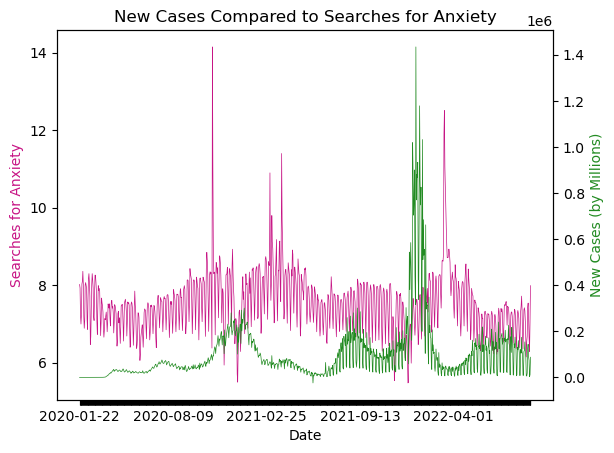

In [70]:
#Compare Searches for anxiety to new cases 
x_axis = mental_df['Date']
y_axisa = mental_df['Searches for Anxiety']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5,)

n = 200 # Keeps every 200th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Anxiety')


plt.savefig("Anxietygraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

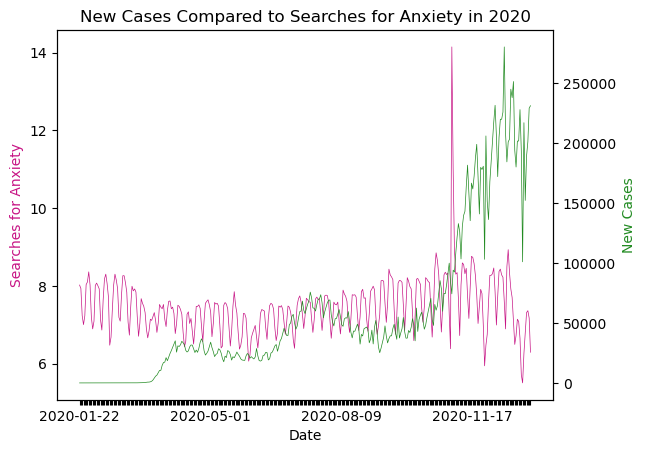

In [71]:
#Filter Graph for 2020 
x_axis = mental_df_2020['Date']
y_axisa = mental_df_2020['Searches for Anxiety']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)



n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]


ax.set_xlabel("Date",)
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Anxiety in 2020')
plt.savefig("Anxiety2020.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

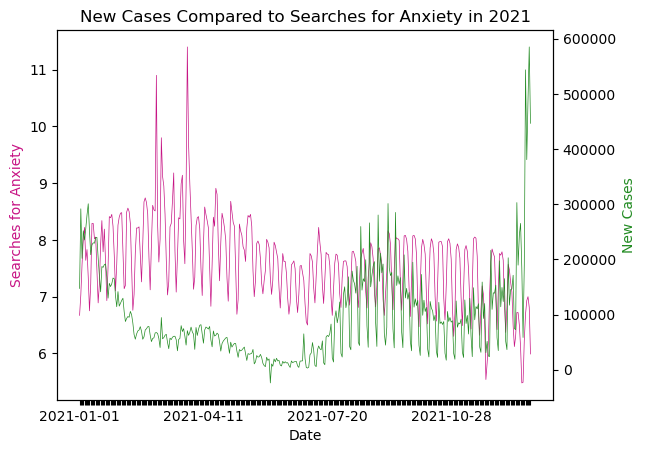

In [72]:
#Filter Graph for 2021 
x_axis = mental_df_2021['Date']
y_axisa = mental_df_2021['Searches for Anxiety']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Anxiety in 2021')
plt.savefig("Anxiety2021.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

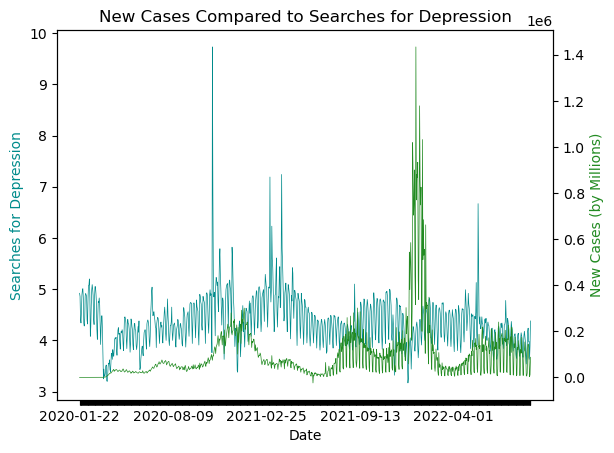

In [73]:
#Compare searches for depression to new covid cases 
x_axis = mental_df['Date']
y_axisd = mental_df['Searches for Depression']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 200
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.savefig("Depressiongraph.jpg")
plt.title('New Cases Compared to Searches for Depression')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

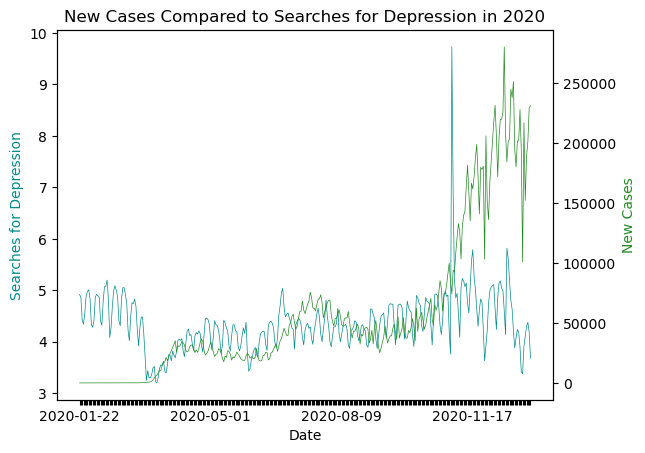

In [74]:
#Filter Depression Graph for 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Depression']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Depression in 2020')
plt.savefig("Depression2020.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

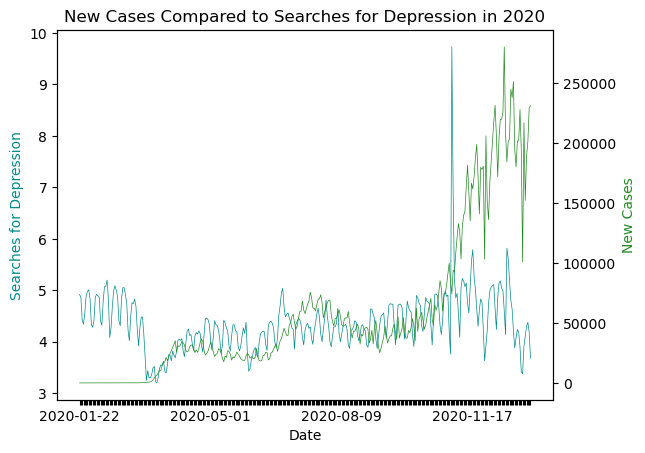

In [75]:
#Filter Depression Graph for 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Depression']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Depression in 2020')
plt.savefig("Depression2020.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

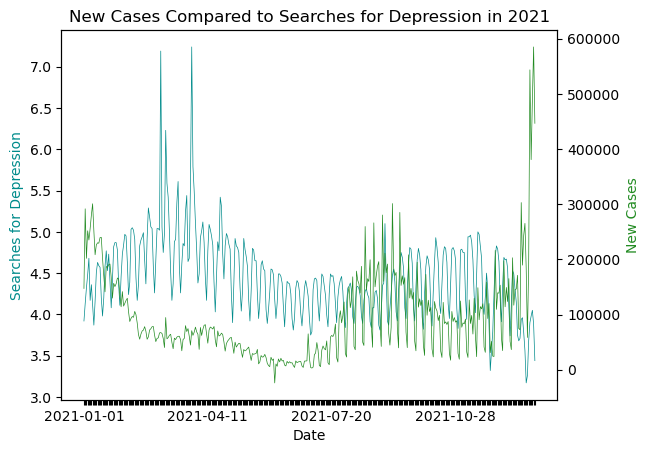

In [76]:
#Filter Depression Graph for 2021
x_axis = mental_df_2021['Date']
y_axisd = mental_df_2021['Searches for Depression']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkcyan', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkcyan')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Depression in 2021')
plt.savefig("Depression2021.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

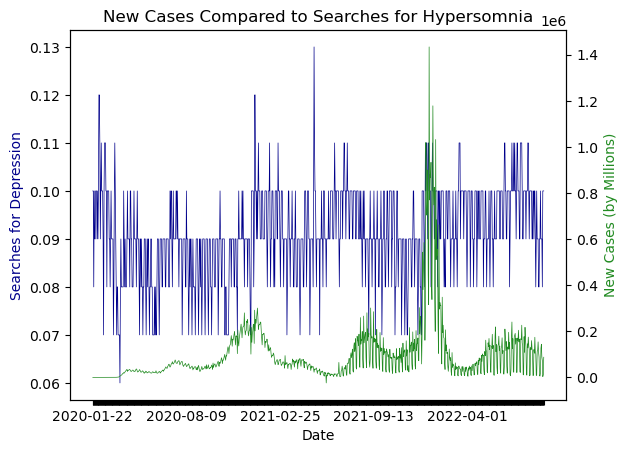

In [77]:
#Compare New Cases to Hypersomnia
x_axis = mental_df['Date']
y_axisd = mental_df['Searches for Hypersomnia']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkblue', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 200
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Depression", color = 'darkblue')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Hypersomnia')
plt.savefig("Hypersomniagraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

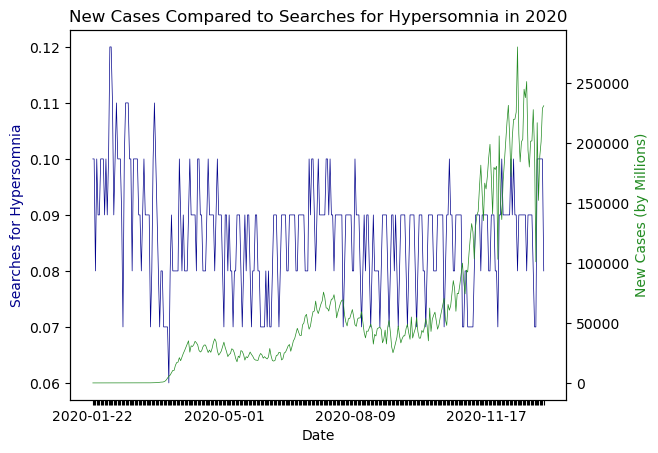

In [78]:
#Filter New Cases to Hypersomnia in 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Hypersomnia']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkblue', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Hypersomnia", color = 'darkblue')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Hypersomnia in 2020')
plt.savefig("Hypersomnia2020.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

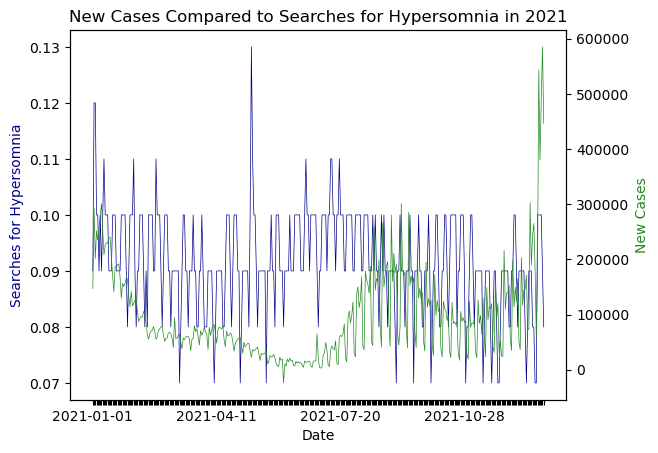

In [79]:
#Filter New Cases to Hypersomnia in 2021
x_axis = mental_df_2021['Date']
y_axisd = mental_df_2021['Searches for Hypersomnia']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'darkblue', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Hypersomnia", color = 'darkblue')
ax2.set_ylabel('New Cases', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Hypersomnia in 2021')
plt.savefig("Hypersomnia2021.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

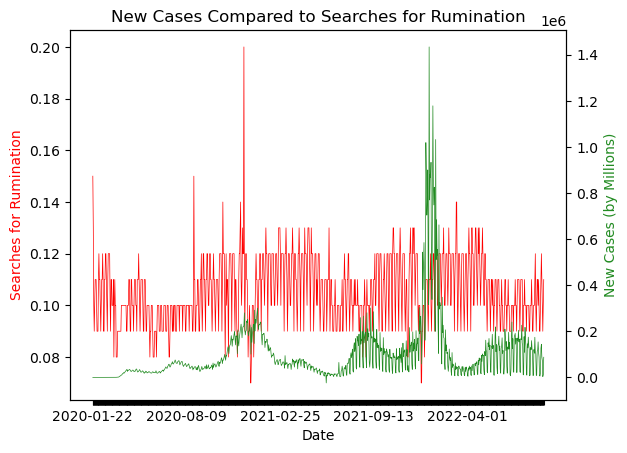

In [80]:
#Compare New Cases to Rumination
x_axis = mental_df['Date']
y_axisd = mental_df['Searches for Rumination']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 200 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Rumination", color = 'red')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Rumination')
plt.savefig("Ruminationgraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

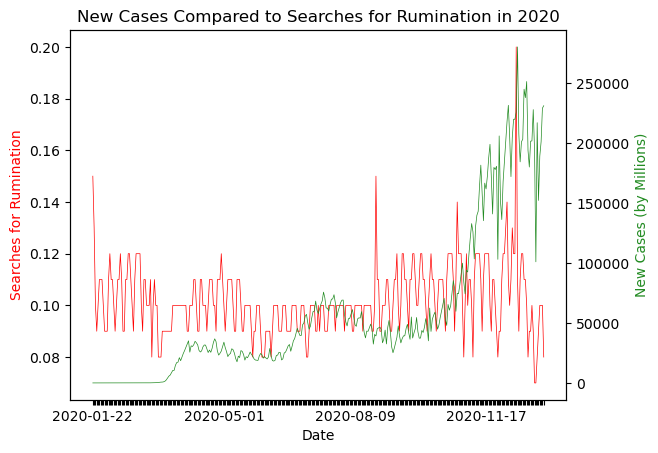

In [81]:
#Filter New Cases to Rumination in 2020
x_axis = mental_df_2020['Date']
y_axisd = mental_df_2020['Searches for Rumination']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Rumination", color = 'red')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Rumination in 2020')
plt.savefig("Rumination2020.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

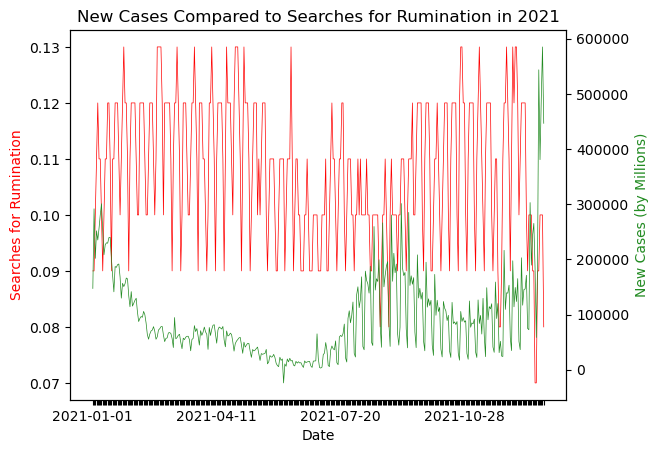

In [82]:
#Filter New Cases to Rumination in 2021
x_axis = mental_df_2021['Date']
y_axisd = mental_df_2021['Searches for Rumination']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisd,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Rumination", color = 'red')
ax2.set_ylabel('New Cases (by Millions)', color = 'forestgreen')
plt.title('New Cases Compared to Searches for Rumination in 2021')
plt.savefig("Hypersomnia2021.jpg")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

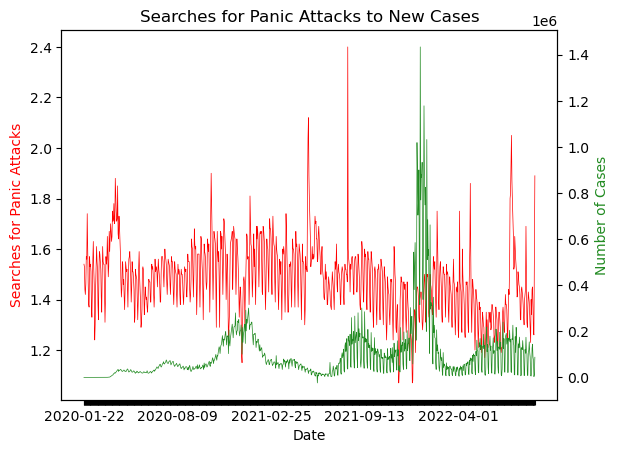

In [83]:
#Compare Searches for Panic attacks to new cases

x_axis = mental_df['Date']
y_axisa = mental_df['Searches for Panic Attacks']
y_axisc = mental_df['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 200
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]



ax.set_xlabel("Date")
ax.set_ylabel("Searches for Panic Attacks", color = 'red')
ax2.set_ylabel('Number of Cases', color = 'forestgreen')
plt.title('Searches for Panic Attacks to New Cases')
plt.savefig("panicgraph.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

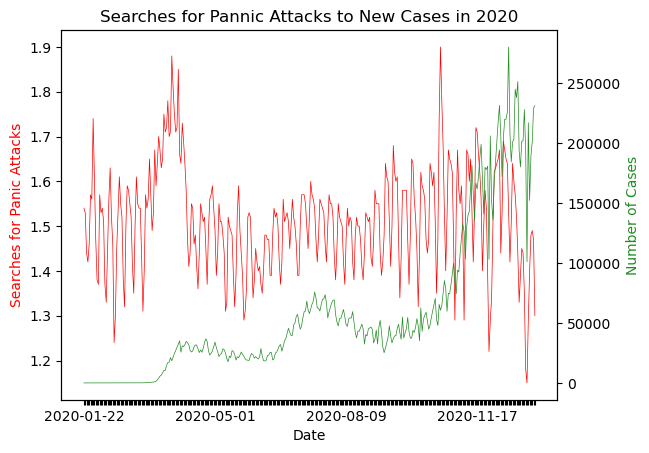

In [84]:
#filter searches for panic attacks to new cases in 2020
x_axis = mental_df_2020['Date']
y_axisa = mental_df_2020['Searches for Panic Attacks']
y_axisc = mental_df_2020['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]



ax.set_xlabel("Date")
ax.set_ylabel("Searches for Panic Attacks", color = 'red')
ax2.set_ylabel('Number of Cases', color = 'forestgreen')
plt.title('Searches for Pannic Attacks to New Cases in 2020')
plt.savefig("Panic2020.jpg")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

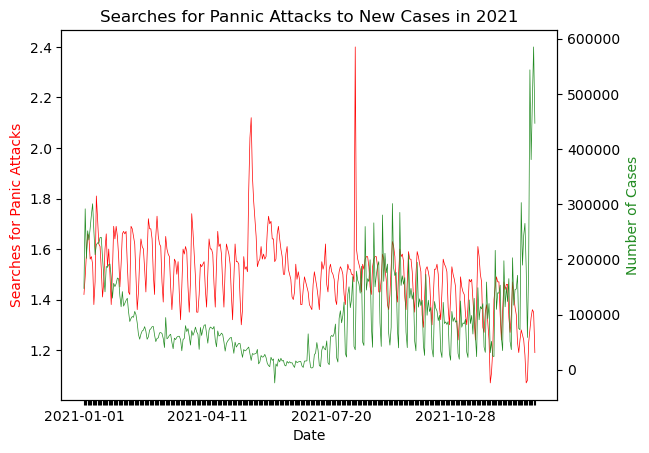

In [85]:
#filter searches for panic attacks to new cases in 2021
x_axis = mental_df_2021['Date']
y_axisa = mental_df_2021['Searches for Panic Attacks']
y_axisc = mental_df_2021['New Cases']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'red', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'forestgreen', linewidth = 0.5)


n = 100
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]



ax.set_xlabel("Date")
ax.set_ylabel("Searches for Panic Attacks", color = 'red')
ax2.set_ylabel('Number of Cases', color = 'forestgreen')
plt.title('Searches for Pannic Attacks to New Cases in 2021')
plt.savefig("Panic2021.jpg")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

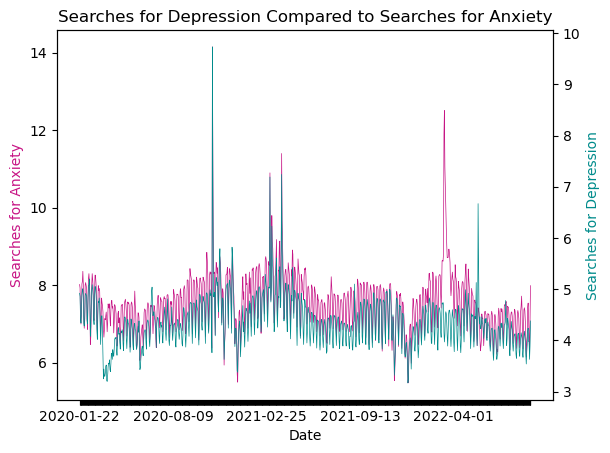

In [86]:
#Compare searches for depression to searches for anxiety 

x_axis = mental_df['Date']
y_axisa = mental_df['Searches for Anxiety']
y_axisc = mental_df['Searches for Depression']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'darkcyan', linewidth = 0.5)

n = 200 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('Searches for Depression', color = 'darkcyan')
plt.title('Searches for Depression Compared to Searches for Anxiety')
plt.savefig("AnxietyDepression.jpg")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

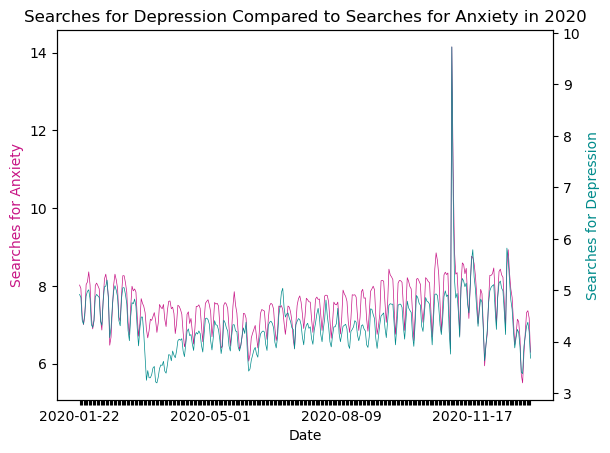

In [87]:
#searches for Depression compared to Anxiety in 2020
x_axis = mental_df_2020['Date']
y_axisa = mental_df_2020['Searches for Anxiety']
y_axisc = mental_df_2020['Searches for Depression']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'darkcyan', linewidth = 0.5)

n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('Searches for Depression', color = 'darkcyan')
plt.title('Searches for Depression Compared to Searches for Anxiety in 2020')
plt.savefig("AnxietyDepression2020.jpg")
plt.show


Text(0.5, 1.0, 'Searches for Depression Compared to Searches for Anxiety in 2021')

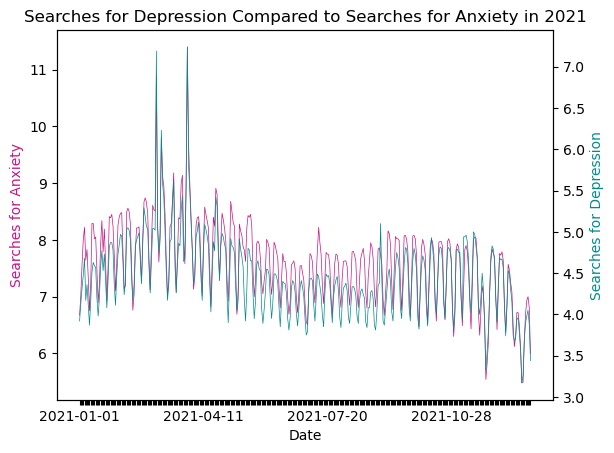

In [88]:
#Searches for depression compared to anxiety in 2021
x_axis = mental_df_2021['Date']
y_axisa = mental_df_2021['Searches for Anxiety']
y_axisc = mental_df_2021['Searches for Depression']

fig, ax = plt.subplots()
ax.plot(x_axis, y_axisa,color = 'mediumvioletred', linewidth = 0.5) 
ax2 = ax.twinx()

ax2.plot(x_axis, y_axisc, color = 'darkcyan', linewidth = 0.5)

n = 100
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date")
ax.set_ylabel("Searches for Anxiety", color = 'mediumvioletred')
ax2.set_ylabel('Searches for Depression', color = 'darkcyan')
plt.savefig("AnxietyDepression2021.jpg")
plt.title('Searches for Depression Compared to Searches for Anxiety in 2021')

The Correlation between Anxiety and Depression is 0.79


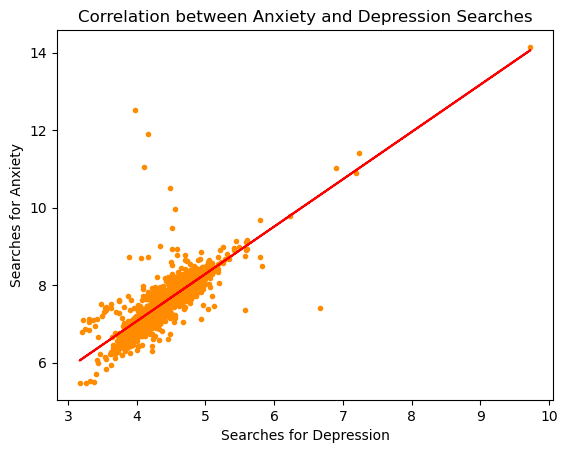

In [89]:
#Determine correlation between searches for anxiety and searches for depression 
from sklearn import datasets
from scipy.stats import linregress

x_axis = mental_df['Searches for Depression']
y_axis = mental_df['Searches for Anxiety']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
plt.scatter(x_axis, y_axis, marker = '.', facecolors = 'darkorange', edgecolors = 'darkorange')
plt.plot(x_axis, regress_values, "r-")
plt.xlabel('Searches for Depression')
plt.ylabel('Searches for Anxiety')
plt.title('Correlation between Anxiety and Depression Searches')
correlation = st.pearsonr(x_axis, y_axis)
plt.savefig('AnxDepcor.jpg')
plt.show 
print(f"The Correlation between Anxiety and Depression is {round(correlation[0],2)}")

In [90]:
mean_depression = mental_df['Searches for Depression'].mean()
mean_anxiety = mental_df['Searches for Anxiety'].mean()
print(f" Average searches for Depression: {mean_depression}")
print(f" Average searches for Anxiety: {mean_anxiety}")

 Average searches for Depression: 4.363326424870467
 Average searches for Anxiety: 7.514580310880829


In [91]:
mean_depression_2020 = mental_df_2020['Searches for Depression'].mean()
mean_anxiety_2020 = mental_df_2020['Searches for Anxiety'].mean()
print(f" Average searches for Depression in 2020: {mean_depression_2020}")
print(f" Average searches for Anxiety in 2020: {mean_anxiety_2020}")  

 Average searches for Depression in 2020: 4.361768115942029
 Average searches for Anxiety in 2020: 7.46495652173913


In [92]:
mean_depression_2021 = mental_df_2021['Searches for Depression'].mean()
mean_anxiety_2021 = mental_df_2021['Searches for Anxiety'].mean()
print(f" Average searches for Depression in 2021: {mean_depression_2021}")
print(f" Average searches for Anxiety in 2021: {mean_anxiety_2021}")

 Average searches for Depression in 2021: 4.45227397260274
 Average searches for Anxiety in 2021: 7.60095890410959


In [93]:
data = {'Search': ['Overall', "2020", "2021"],
       'Average Depression Frequency': [mean_depression, mean_depression_2020, mean_depression_2021],
       'Average Anxiety Frequency': [mean_anxiety, mean_anxiety_2020, mean_anxiety_2021]}

average_df = pd.DataFrame(data)
average_df

Search  Average Depression Frequency  Average Anxiety Frequency
0  Overall                      4.363326                   7.514580
1     2020                      4.361768                   7.464957
2     2021                      4.452274                   7.600959

<function matplotlib.pyplot.show(close=None, block=None)>

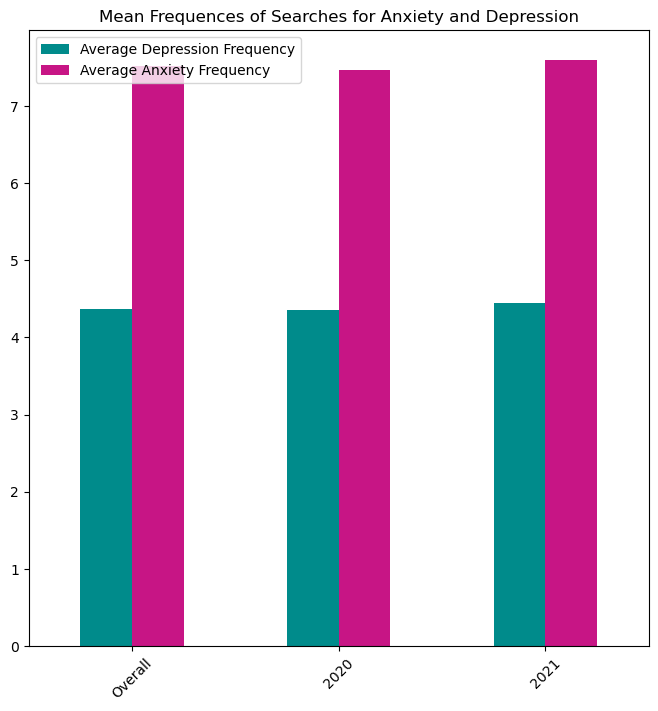

In [94]:
colors = ['darkcyan', 'mediumvioletred']
ax = average_df.plot(kind = 'bar', figsize = (8,8), color = colors, rot=0)
ax.set_xticklabels(average_df['Search'], rotation =45)
plt.title('Mean Frequences of Searches for Anxiety and Depression')
plt.savefig('meananxdep.jpg')
plt.show